# Manuscript Companion for: "Subcortical Functional Connectivity Gradients in Temporal Lobe Epilepsy"

## Loading the Data

This requires the files `harmonized_gradients.pickle` and `regions.pickle` files from the `source_data` directory. 

- `harmonized_gradients.pickle` contains harmonized subcortical functional connectivity gradients for the left (`ep_L_grad`) and right (`ep_R_grad`) TLE subjects and Control subjects (`hc_grad`).
- `regions.pickle` contains the subcortical region assignments for each of the gradient values 

In [75]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from tqdm import tqdm

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE, family='Arial')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

f = open('./source_data/harmonized_gradients.pickle', 'rb')

#f = open('./harmonized_final_true_3_20_2023.pickle', 'rb')
data_dict = pickle.load(f)

f = open('./source_data/regions.pickle', 'rb')
regions = pickle.load(f)

region_values = [6017.0,
 2049.0,
 3011.0,
 6053.0,
 7018.0,
 3050.0,
 4012.0,
 7054.0,
 4051.0,
 5013.0,
 2010.0,
 5052.0]

# ipsilateral values will go first
region_values_l_tle = np.array([6017.0,6053.0,7018.0,7054.0,2010.0,2049.0,3011.0,3050.0,4012.0, 4051.0, 5013.0, 5052.0 ])
region_values_r_tle = np.array([6053.0,6017.0,7054.0,7018.0,2049.0,2010.0,3050.0,3011.0, 4051.0,4012.0,  5052.0,5013.0 ])


region_names = np.array(['I-Hippocampus','C-Hippocampus', 'I-Amygdala','C-Amygdala','I-Thalamus','C-Thalamus','I-Caudate','C-Caudate','I-Putamen','C-Putamen','I-Pallidum','C-Pallidum'])

region_names_control = np.array(['L-Hippocampus','R-Hippocampus', 'L-Amygdala','R-Amygdala','L-Thalamus','R-Thalamus','L-Caudate','R-Caudate','L-Putamen','R-Putamen','L-Pallidum','R-Pallidum'])

region_names_bl = np.array(['Hippocampus','Hippocampus', 'Amygdala','Amygdala','Thalamus','Thalamus','Caudate','Caudate','Putamen','Putamen','Pallidum','Pallidum'])


region_names_all_l_tle = list(map(lambda x: region_names[region_values_l_tle==x][0], regions['roi']))
region_names_all_r_tle = list(map(lambda x: region_names[region_values_r_tle==x][0], regions['roi']))

region_names_all_bl = list(map(lambda x: region_names_bl[region_values_l_tle==x][0], regions['roi']))
region_names_all_control = list(map(lambda x: region_names_control[region_values_l_tle==x][0], regions['roi']))

#region_names = ['L-Hippocampus','R-Thalamus','L-Caudate', 'R-Hippocampus', 'L-Amygdala', 'R-Caudate', 'L-Putamen', 'R-Amygdala', 'R-Putamen', 'L-Pallidum', 'L-Thalamus','R-Pallidum']

In [76]:
print('Labels in the dictionary: ', list(data_dict.keys()))
if 'ltle_grad' in list(data_dict.keys()):
    data_dict['ep_L_grad']= data_dict['ltle_grad']
    data_dict['ep_R_grad']= data_dict['rtle_grad']

# Flip the first gradient

data_dict['ep_L_grad'][:,0,:] = -data_dict['ep_L_grad'][:,0,:]
data_dict['ep_R_grad'][:,0,:] = -data_dict['ep_R_grad'][:,0,:]
data_dict['hc_grad'][:,0,:] = -data_dict['hc_grad'][:,0,:]

Labels in the dictionary:  ['hc_grad', 'ep_L_grad', 'ep_R_grad']


In [55]:
print('L-TLE Subjects: ', data_dict['ep_L_grad'].shape[-1])
print('R-TLE Subjects: ', data_dict['ep_R_grad'].shape[-1])
print('HC Subjects: ', data_dict['hc_grad'].shape[-1])

L-TLE Subjects:  31
R-TLE Subjects:  24
HC Subjects:  16


In [9]:
#data_dict['ep_L_grad'] = ep_L_zscored
#data_dict['ep_R_grad'] = ep_R_zscored

df_plot = pd.DataFrame()
df_plot['Grad 1'] = np.hstack((np.mean(data_dict['ep_L_grad'],axis=2)[:,0] , np.mean(data_dict['ep_R_grad'],axis=2)[:,0]))
df_plot['Grad 2'] = np.hstack((np.mean(data_dict['ep_L_grad'],axis=2)[:,1] , np.mean(data_dict['ep_R_grad'],axis=2)[:,1]))
df_plot['Group'] = ['L-TLE']*len(np.mean(data_dict['ep_L_grad'],axis=2)[:,1]) + ['R-TLE']*len(np.mean(data_dict['ep_R_grad'],axis=2)[:,1])
df_plot['ROI'] = np.hstack((region_names_all_l_tle,region_names_all_r_tle))

# Dataframe with all ROIs combined (e.g. L-Hippo. and R-Hippo. are just Hippo)
df_plot2 = pd.DataFrame()
df_plot2['Grad 1'] = np.hstack((np.mean(data_dict['ep_L_grad'],axis=2)[:,0] , np.mean(data_dict['ep_R_grad'],axis=2)[:,0]))
df_plot2['Grad 2'] = np.hstack((np.mean(data_dict['ep_L_grad'],axis=2)[:,1] , np.mean(data_dict['ep_R_grad'],axis=2)[:,1]))
df_plot2['Group'] = ['L-TLE']*len(np.mean(data_dict['ep_L_grad'],axis=2)[:,1]) + ['R-TLE']*len(np.mean(data_dict['ep_R_grad'],axis=2)[:,1])
df_plot2['ROI'] = np.hstack((region_names_all_bl,region_names_all_bl))



## Gradient Space Analysis

#### Scatterplots of the mean gradient values across voxels

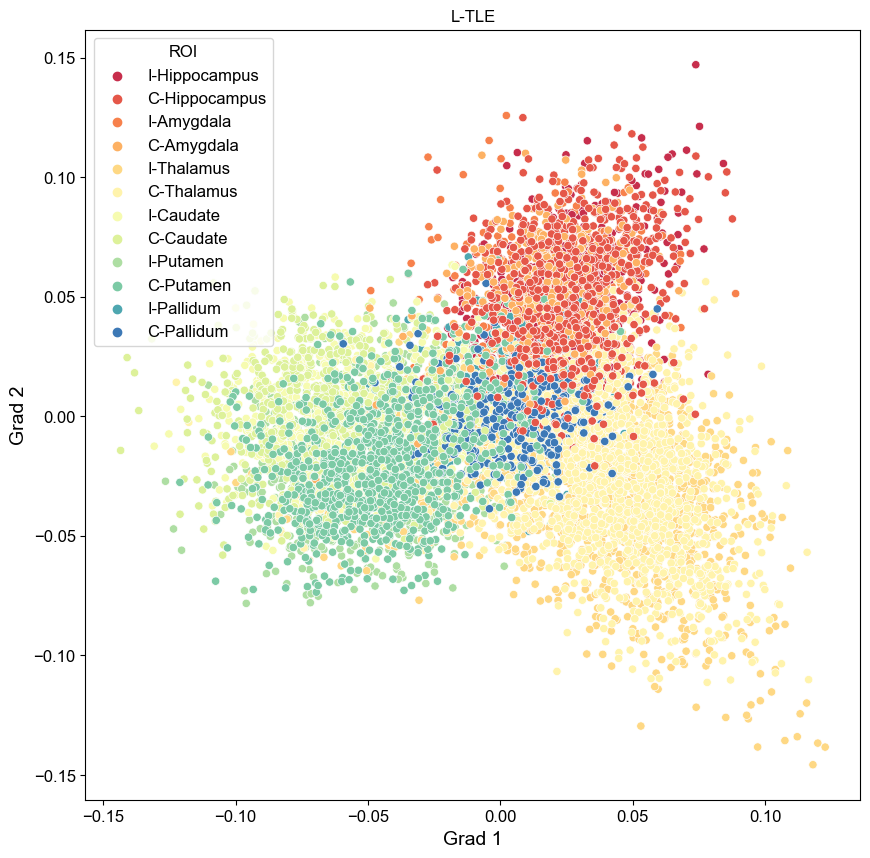

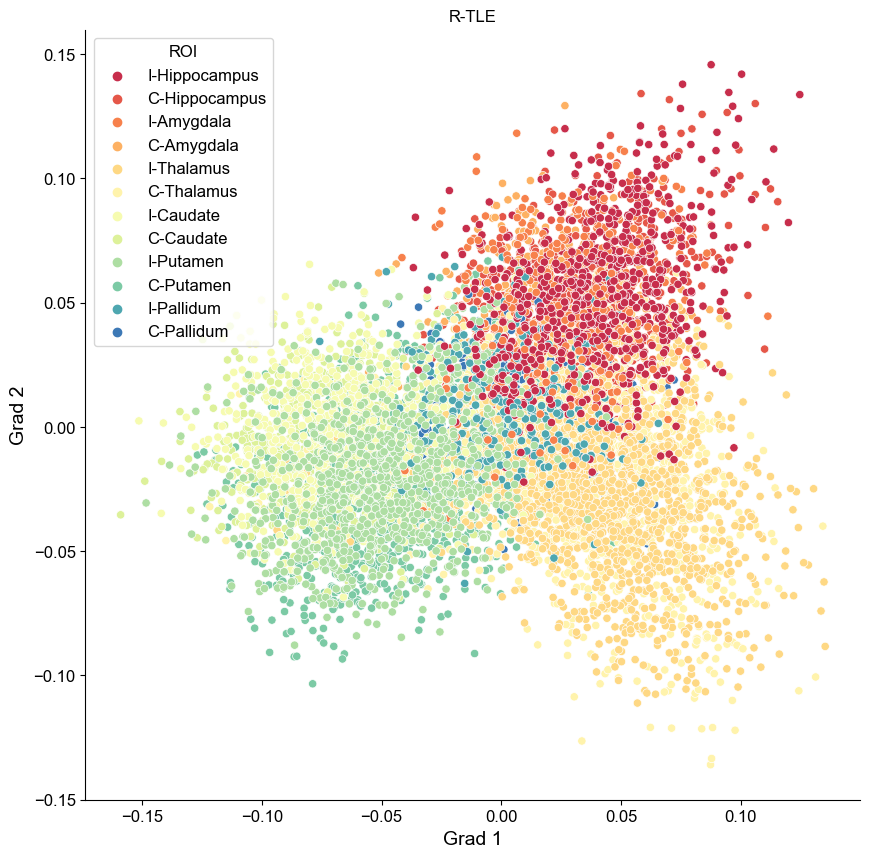

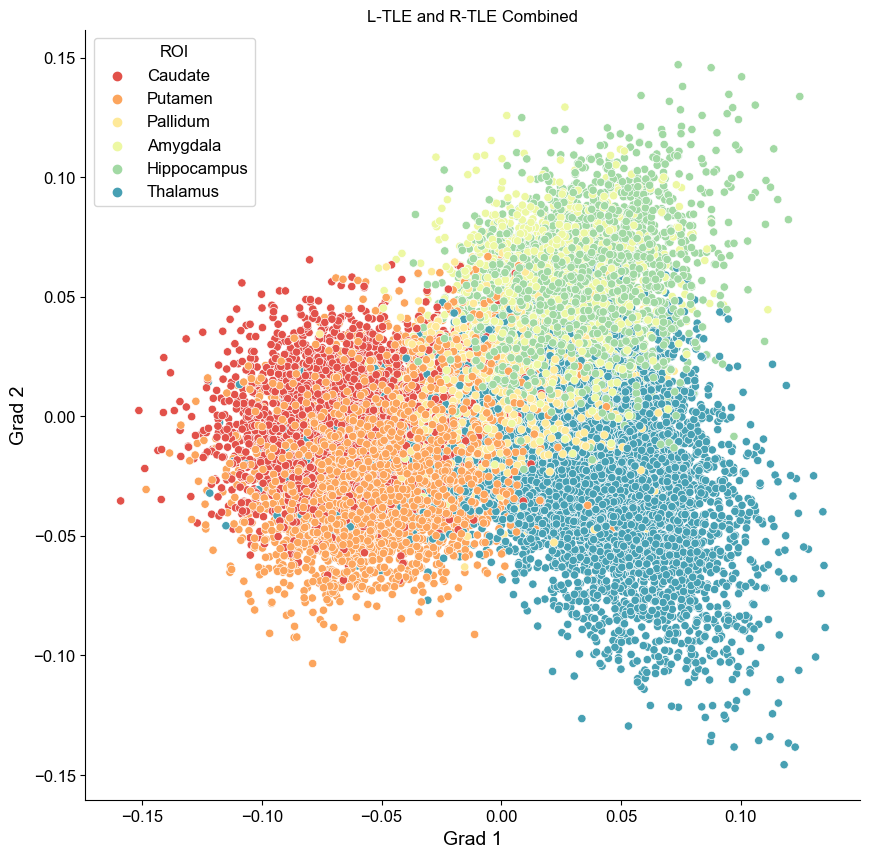

In [11]:
plt.figure(figsize=(10,10))
plt.title('L-TLE')
sns.scatterplot(x='Grad 1', y='Grad 2', hue='ROI', data=df_plot[df_plot['Group']=='L-TLE'],  hue_order=region_names, palette='Spectral')

plt.figure(figsize=(10,10))
plt.title('R-TLE')
sns.scatterplot(x='Grad 1', y='Grad 2', hue='ROI', data=df_plot[df_plot['Group']=='R-TLE'],  hue_order=region_names, palette='Spectral')
sns.despine()

plt.figure(figsize=(10,10))
plt.title('L-TLE and R-TLE Combined')
sns.scatterplot(x='Grad 1', y='Grad 2', hue='ROI', data=df_plot2,  hue_order=['Caudate','Putamen','Pallidum','Amygdala','Hippocampus','Thalamus'], palette='Spectral')
sns.despine()


#### Boxplot of the mean gradient values in each ROI across voxels

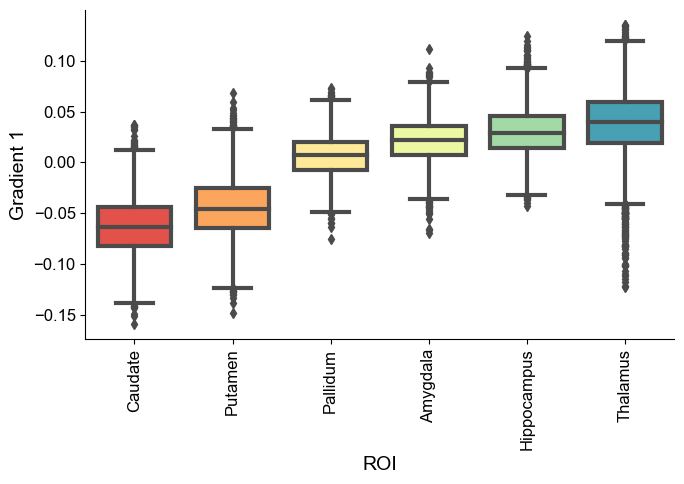

In [13]:
# boxplot of the gradient 1 values across ROIs for TLE subjects

plt.figure(figsize=(7,5))
sns.boxplot(y='Grad 1', x='ROI', data=df_plot2, order=['Caudate','Putamen','Pallidum','Amygdala','Hippocampus','Thalamus'],palette='Spectral', width=0.75, color='k',linewidth=3, saturation=1)
plt.xticks(rotation=90)
plt.ylabel('Gradient 1')
sns.despine()
plt.tight_layout()
#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/global_gradients/gradient1_boxplot.pdf')

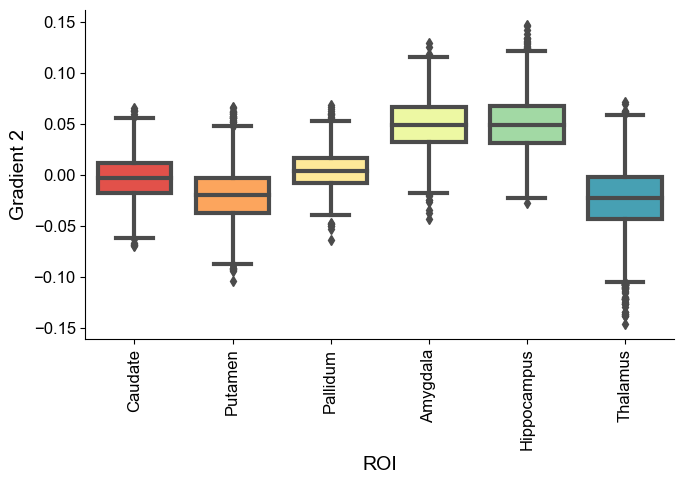

In [14]:
# boxplot of the gradient 2 values across ROIs for TLE subjects

plt.figure(figsize=(7,5))
sns.boxplot(y='Grad 2', x='ROI', data=df_plot2, order=['Caudate','Putamen','Pallidum','Amygdala','Hippocampus','Thalamus'],palette='Spectral', width=0.75, color='k',linewidth=3, saturation=1)
plt.xticks(rotation=90)
plt.ylabel('Gradient 2')
sns.despine()
plt.tight_layout()
#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/global_gradients/gradient2_boxplot.pdf')

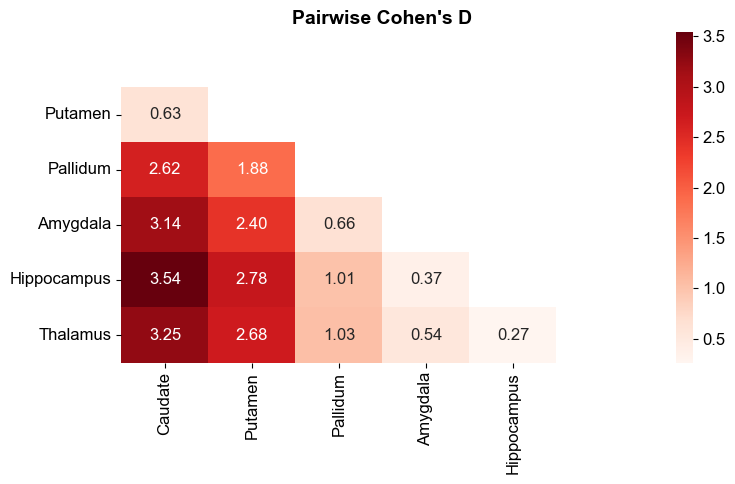

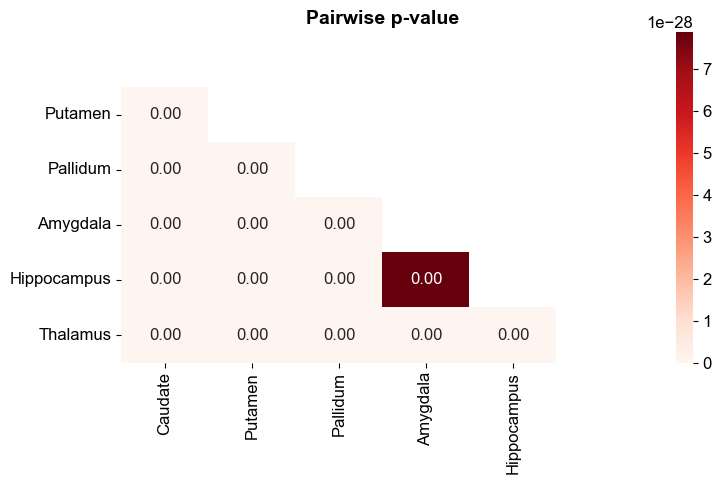

In [15]:
# Stats for the plot above, gradient 1
roi_list = ['Caudate','Putamen','Pallidum','Amygdala','Hippocampus','Thalamus']
t_test_mat = np.zeros((len(roi_list),len(roi_list)))
p_val_mat = np.zeros((len(roi_list),len(roi_list)))
cohend_mat = np.zeros((len(roi_list),len(roi_list)))

for i in range(len(roi_list)):
    for j in range(len(roi_list)):
        x1 = df_plot2[(df_plot2['ROI']==roi_list[i])]['Grad 1']
        x2 = df_plot2[(df_plot2['ROI']==roi_list[j])]['Grad 1']
        t,p = stats.ttest_ind(x1,x2)
        t_test_mat[i,j] = t
        p_val_mat[i,j] = p
        cohend_mat[i,j] = cohend(x1,x2)

mask = np.zeros_like(cohend_mat)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,5))
sns.heatmap(np.abs(cohend_mat), mask=mask, cmap='Reds', annot=True, fmt=".2f")
plt.xticks(np.arange(5)+0.5, roi_list[:-1], rotation=90)
plt.yticks(np.arange(1,6)+0.5, roi_list[1:], rotation=0)
plt.title('Pairwise Cohen\'s D', fontsize=14, fontweight='bold')
plt.tight_layout()

#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/global_gradients/gradient1_cohend_updated_reds.pdf')

plt.figure(figsize=(8,5))
sns.heatmap(np.abs(p_val_mat)*(6*5/2), mask=mask, cmap='Reds', annot=True, fmt=".2f")
plt.xticks(np.arange(5)+0.5, roi_list[:-1], rotation=90)
plt.yticks(np.arange(1,6)+0.5, roi_list[1:], rotation=0)
plt.title('Pairwise p-value', fontsize=14, fontweight='bold')
plt.tight_layout()



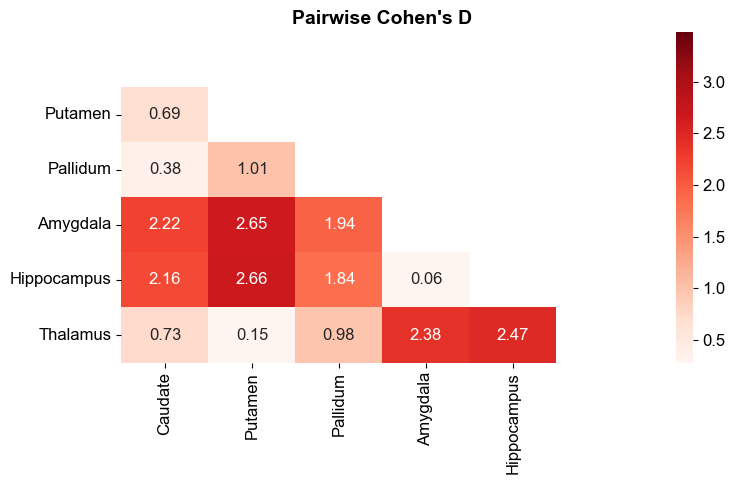

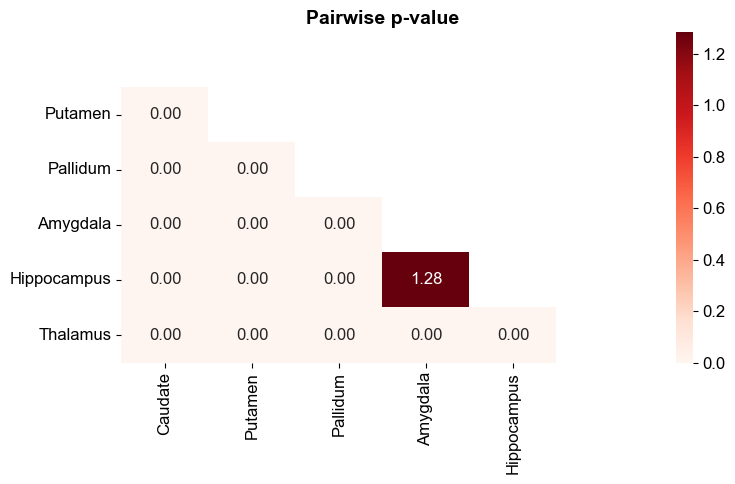

In [16]:
# Stats for the plot above, gradient 2
roi_list = ['Caudate','Putamen','Pallidum','Amygdala','Hippocampus','Thalamus']
t_test_mat = np.zeros((len(roi_list),len(roi_list)))
p_val_mat = np.zeros((len(roi_list),len(roi_list)))
cohend_mat = np.zeros((len(roi_list),len(roi_list)))

for i in range(len(roi_list)):
    for j in range(len(roi_list)):
        x1 = df_plot2[(df_plot2['ROI']==roi_list[i])]['Grad 2']
        x2 = df_plot2[(df_plot2['ROI']==roi_list[j])]['Grad 2']
        t,p = stats.ttest_ind(x1,x2)
        t_test_mat[i,j] = t
        p_val_mat[i,j] = p
        cohend_mat[i,j] = cohend(x1,x2)

mask = np.zeros_like(cohend_mat)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,5))
sns.heatmap(np.abs(cohend_mat), mask=mask, cmap='Reds', annot=True, fmt=".2f", vmin=0.28, vmax=3.48)
plt.xticks(np.arange(5)+0.5, roi_list[:-1], rotation=90)
plt.yticks(np.arange(1,6)+0.5, roi_list[1:], rotation=0)
plt.title('Pairwise Cohen\'s D', fontsize=14, fontweight='bold')
plt.tight_layout()
#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/global_gradients/gradient2_cohend_updated_reds.pdf')

plt.figure(figsize=(8,5))
sns.heatmap(np.abs(p_val_mat)*(6*5/2), mask=mask, cmap='Reds', annot=True, fmt=".2f")
plt.xticks(np.arange(5)+0.5, roi_list[:-1], rotation=90)
plt.yticks(np.arange(1,6)+0.5, roi_list[1:], rotation=0)
plt.title('Pairwise p-value', fontsize=14, fontweight='bold')
plt.tight_layout()
#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/global_gradients/gradient1_cohend.pdf')

#### As above but for Ipsilateral and Contralateral regions

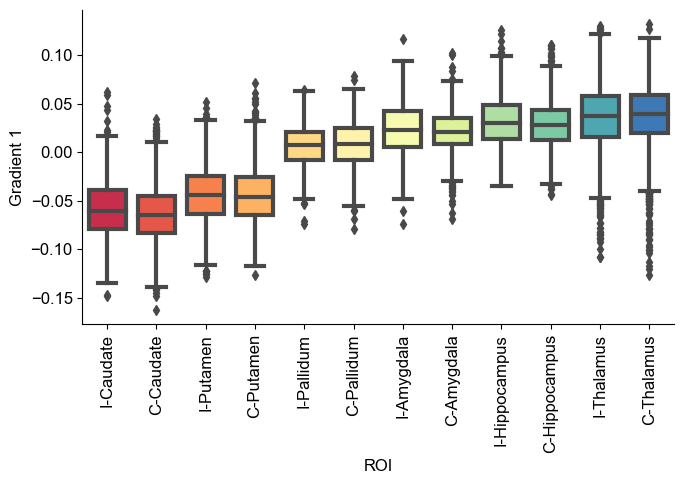

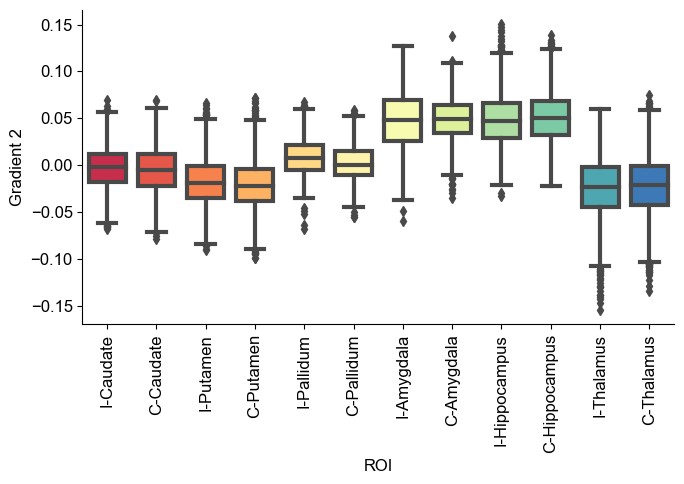

In [63]:
plt.figure(figsize=(7,5))
sns.boxplot(y='Grad 1', x='ROI', data=df_plot, order=['I-Caudate','C-Caudate','I-Putamen','C-Putamen','I-Pallidum','C-Pallidum','I-Amygdala','C-Amygdala','I-Hippocampus','C-Hippocampus','I-Thalamus','C-Thalamus'],palette='Spectral', width=0.75, color='k',linewidth=3, saturation=1)
plt.xticks(rotation=90)
plt.ylabel('Gradient 1')
sns.despine()
plt.tight_layout()
#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/global_gradients/gradient1_boxplot_uni_updated.pdf')

plt.figure(figsize=(7,5))
sns.boxplot(y='Grad 2', x='ROI', data=df_plot, order=['I-Caudate','C-Caudate','I-Putamen','C-Putamen','I-Pallidum','C-Pallidum','I-Amygdala','C-Amygdala','I-Hippocampus','C-Hippocampus','I-Thalamus','C-Thalamus'],palette='Spectral', width=0.75, color='k',linewidth=3, saturation=1)
plt.xticks(rotation=90)
plt.ylabel('Gradient 2')
sns.despine()
plt.tight_layout()
#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/global_gradients/gradient2_boxplot_uni_updated.pdf')

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (11).

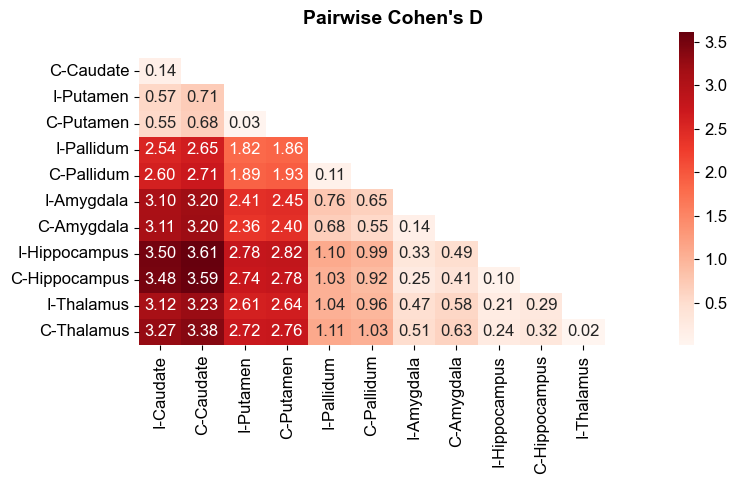

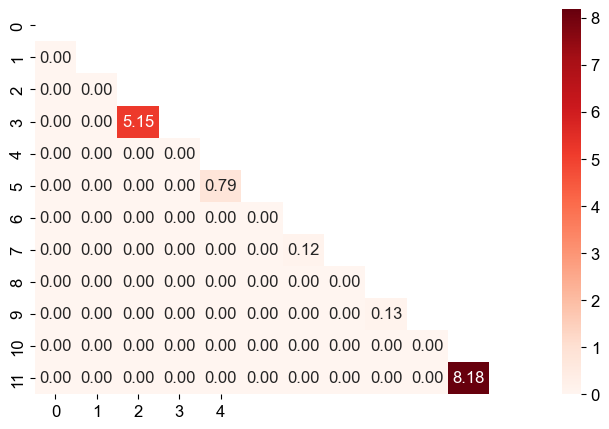

In [17]:
# Stats for the above plot - Gradient 1
roi_list = ['I-Caudate','C-Caudate','I-Putamen','C-Putamen','I-Pallidum','C-Pallidum','I-Amygdala','C-Amygdala','I-Hippocampus','C-Hippocampus','I-Thalamus','C-Thalamus']
p_val_mat = np.zeros((len(roi_list),len(roi_list)))
cohend_mat = np.zeros((len(roi_list),len(roi_list)))
t_test_mat = np.zeros((len(roi_list),len(roi_list)))

for i in range(len(roi_list)):
    for j in range(len(roi_list)):
        x1 = df_plot[(df_plot['ROI']==roi_list[i])]['Grad 1']
        x2 = df_plot[(df_plot['ROI']==roi_list[j])]['Grad 1']
        t,p = stats.ttest_ind(x1,x2)
        t_test_mat[i,j] = t
        p_val_mat[i,j] = p
        cohend_mat[i,j] = cohend(x1,x2)


mask = np.zeros_like(cohend_mat)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,5))
sns.heatmap(np.abs(cohend_mat), mask=mask, cmap='Reds', annot=True, fmt=".2f")
plt.xticks(np.arange(11)+0.5, roi_list[:-1], rotation=90)
plt.yticks(np.arange(1,12)+0.5, roi_list[1:], rotation=0)
plt.title('Pairwise Cohen\'s D', fontsize=14, fontweight='bold')
plt.tight_layout()
#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/global_gradients/gradient1_cohend_ipsi_contra_updated_reds.pdf')

plt.figure(figsize=(8,5))
sns.heatmap(np.abs(p_val_mat)*(6*5/2), mask=mask, cmap='Reds', annot=True, fmt=".2f")
plt.xticks(np.arange(5)+0.5, roi_list[:-1], rotation=90)
plt.yticks(np.arange(1,6)+0.5, roi_list[1:], rotation=0)
plt.title('Pairwise p-value', fontsize=14, fontweight='bold')
plt.tight_layout()

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (11).

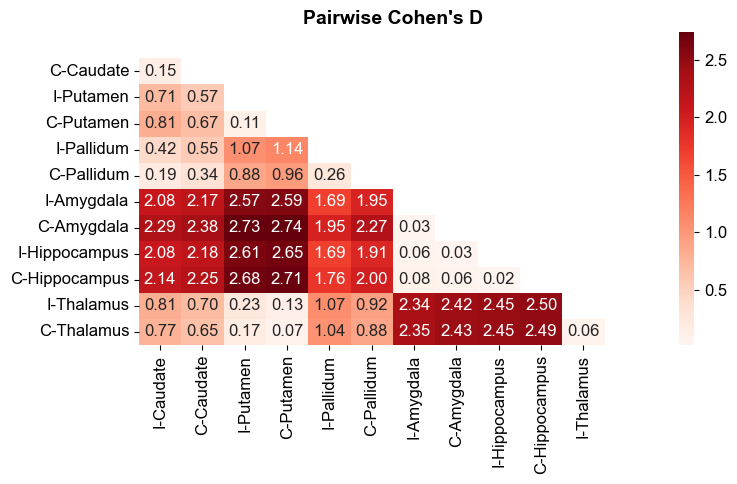

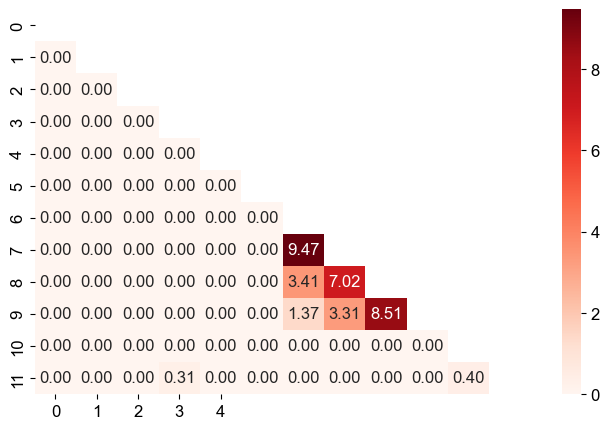

In [18]:
# Stats for the above plot - Gradient 2
roi_list = ['I-Caudate','C-Caudate','I-Putamen','C-Putamen','I-Pallidum','C-Pallidum','I-Amygdala','C-Amygdala','I-Hippocampus','C-Hippocampus','I-Thalamus','C-Thalamus']
p_val_mat = np.zeros((len(roi_list),len(roi_list)))
cohend_mat = np.zeros((len(roi_list),len(roi_list)))
t_test_mat = np.zeros((len(roi_list),len(roi_list)))

for i in range(len(roi_list)):
    for j in range(len(roi_list)):
        x1 = df_plot[(df_plot['ROI']==roi_list[i])]['Grad 2']
        x2 = df_plot[(df_plot['ROI']==roi_list[j])]['Grad 2']
        t,p = stats.ttest_ind(x1,x2)
        t_test_mat[i,j] = t
        p_val_mat[i,j] = p
        cohend_mat[i,j] = cohend(x1,x2)


mask = np.zeros_like(cohend_mat)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,5))
sns.heatmap(np.abs(cohend_mat), mask=mask, cmap='Reds', annot=True, fmt=".2f")
plt.xticks(np.arange(11)+0.5, roi_list[:-1], rotation=90)
plt.yticks(np.arange(1,12)+0.5, roi_list[1:], rotation=0)
plt.title('Pairwise Cohen\'s D', fontsize=14, fontweight='bold')
plt.tight_layout()
#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/global_gradients/gradient2_cohend_ipsi_contra_updated_reds.pdf')

plt.figure(figsize=(8,5))
sns.heatmap(np.abs(p_val_mat)*(6*5/2), mask=mask, cmap='Reds', annot=True, fmt=".2f")
plt.xticks(np.arange(5)+0.5, roi_list[:-1], rotation=90)
plt.yticks(np.arange(1,6)+0.5, roi_list[1:], rotation=0)
plt.title('Pairwise p-value', fontsize=14, fontweight='bold')
plt.tight_layout()

### Gradient values for control subjects

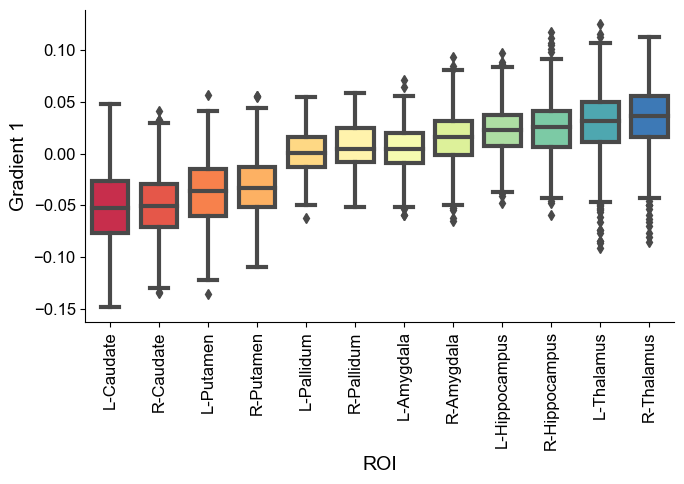

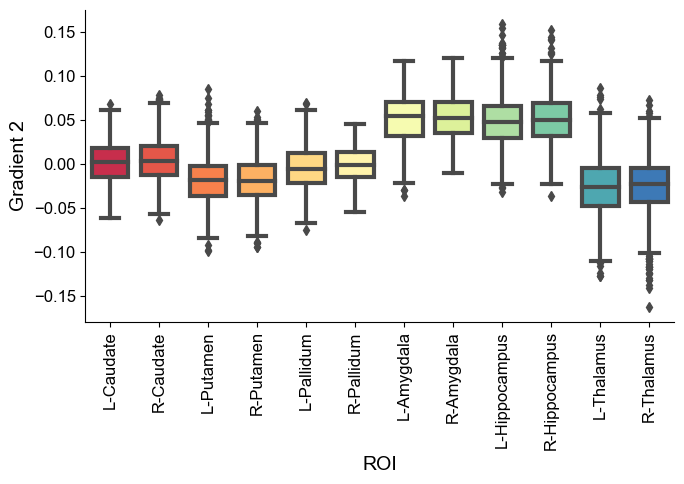

In [19]:
# Take only the controls
df_plot = pd.DataFrame()
df_plot['Grad 1'] = np.mean(data_dict['hc_grad'],axis=2)[:,0]
df_plot['Grad 2'] = np.mean(data_dict['hc_grad'],axis=2)[:,1] 
df_plot['Group'] = ['HC']*len(np.mean(data_dict['hc_grad'],axis=2)[:,1])
df_plot['ROI'] = np.hstack((region_names_all_control))

df_plot2 = pd.DataFrame()
df_plot2['Grad 1'] = -np.mean(data_dict['hc_grad'],axis=2)[:,0]
df_plot2['Grad 2'] = np.mean(data_dict['hc_grad'],axis=2)[:,1]
df_plot2['Group'] = ['HC']*len(np.mean(data_dict['hc_grad'],axis=2)[:,1]) 
df_plot2['ROI'] = np.hstack((region_names_all_control))


plt.figure(figsize=(7,5))
sns.boxplot(y='Grad 1', x='ROI', data=df_plot, order=['L-Caudate','R-Caudate','L-Putamen','R-Putamen','L-Pallidum','R-Pallidum','L-Amygdala','R-Amygdala','L-Hippocampus','R-Hippocampus','L-Thalamus','R-Thalamus'],palette='Spectral', width=0.75, color='k',linewidth=3, saturation=1)
plt.xticks(rotation=90)
plt.ylabel('Gradient 1')
sns.despine()
plt.tight_layout()
#plt.savefig('./gradient1_boxplot_lr_controls.pdf')

plt.figure(figsize=(7,5))
sns.boxplot(y='Grad 2', x='ROI', data=df_plot, order=['L-Caudate','R-Caudate','L-Putamen','R-Putamen','L-Pallidum','R-Pallidum','L-Amygdala','R-Amygdala','L-Hippocampus','R-Hippocampus','L-Thalamus','R-Thalamus'],palette='Spectral', width=0.75, color='k',linewidth=3, saturation=1)
plt.xticks(rotation=90)
plt.ylabel('Gradient 2')
sns.despine()
plt.tight_layout()
#plt.savefig('./gradient2_boxplot_lr_controls.pdf')


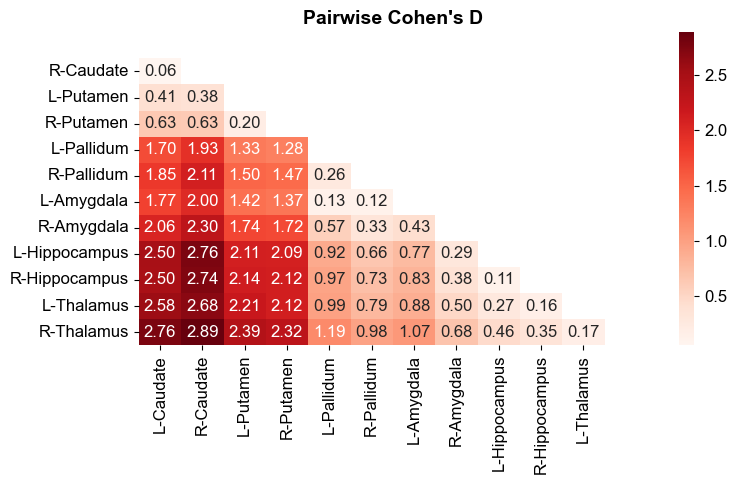

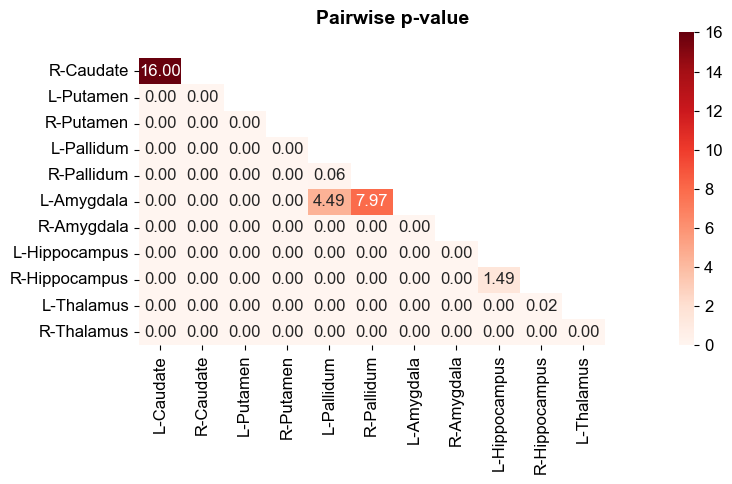

In [20]:
# Stats for the above plot - Gradient 1
roi_list = ['L-Caudate','R-Caudate','L-Putamen','R-Putamen','L-Pallidum','R-Pallidum','L-Amygdala','R-Amygdala','L-Hippocampus','R-Hippocampus','L-Thalamus','R-Thalamus']
p_val_mat = np.zeros((len(roi_list),len(roi_list)))
cohend_mat = np.zeros((len(roi_list),len(roi_list)))
t_test_mat = np.zeros((len(roi_list),len(roi_list)))

for i in range(len(roi_list)):
    for j in range(len(roi_list)):
        x1 = df_plot[(df_plot['ROI']==roi_list[i])]['Grad 1']
        x2 = df_plot[(df_plot['ROI']==roi_list[j])]['Grad 1']
        t,p = stats.ttest_ind(x1,x2)
        t_test_mat[i,j] = t
        p_val_mat[i,j] = p
        cohend_mat[i,j] = cohend(x1,x2)

mask = np.zeros_like(cohend_mat)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,5))
sns.heatmap(np.abs(cohend_mat), mask=mask, cmap='Reds', annot=True, fmt=".2f")
plt.xticks(np.arange(11)+0.5, roi_list[:-1], rotation=90)
plt.yticks(np.arange(1,12)+0.5, roi_list[1:], rotation=0)
plt.title('Pairwise Cohen\'s D', fontsize=14, fontweight='bold')
plt.tight_layout()
#plt.savefig('./gradient1_cohensd_lr_controls.pdf')

#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/global_gradients/gradient1_cohend_ipsi_contra_updated_reds.pdf')

plt.figure(figsize=(8,5))
sns.heatmap(np.abs(p_val_mat)*(11*10/2), mask=mask, cmap='Reds', annot=True, fmt=".2f")
plt.xticks(np.arange(11)+0.5, roi_list[:-1], rotation=90)
plt.yticks(np.arange(1,12)+0.5, roi_list[1:], rotation=0)
plt.title('Pairwise p-value', fontsize=14, fontweight='bold')
plt.tight_layout()

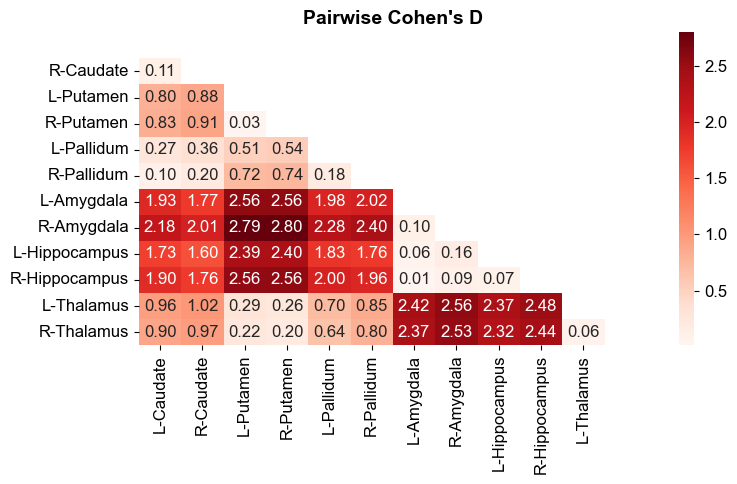

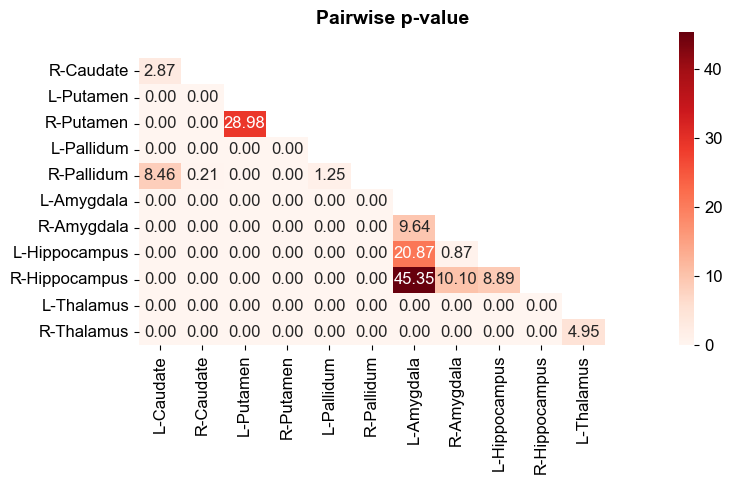

In [21]:
# Stats for the above plot - Gradient 2
roi_list = ['L-Caudate','R-Caudate','L-Putamen','R-Putamen','L-Pallidum','R-Pallidum','L-Amygdala','R-Amygdala','L-Hippocampus','R-Hippocampus','L-Thalamus','R-Thalamus']
p_val_mat = np.zeros((len(roi_list),len(roi_list)))
cohend_mat = np.zeros((len(roi_list),len(roi_list)))
t_test_mat = np.zeros((len(roi_list),len(roi_list)))

for i in range(len(roi_list)):
    for j in range(len(roi_list)):
        x1 = df_plot[(df_plot['ROI']==roi_list[i])]['Grad 2']
        x2 = df_plot[(df_plot['ROI']==roi_list[j])]['Grad 2']
        t,p = stats.ttest_ind(x1,x2)
        t_test_mat[i,j] = t
        p_val_mat[i,j] = p
        cohend_mat[i,j] = cohend(x1,x2)

mask = np.zeros_like(cohend_mat)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,5))
sns.heatmap(np.abs(cohend_mat), mask=mask, cmap='Reds', annot=True, fmt=".2f")
plt.xticks(np.arange(11)+0.5, roi_list[:-1], rotation=90)
plt.yticks(np.arange(1,12)+0.5, roi_list[1:], rotation=0)
plt.title('Pairwise Cohen\'s D', fontsize=14, fontweight='bold')
plt.tight_layout()
#plt.savefig('./gradient2_cohensd_lr_controls.pdf')

#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/global_gradients/gradient1_cohend_ipsi_contra_updated_reds.pdf')

plt.figure(figsize=(8,5))
sns.heatmap(np.abs(p_val_mat)*(11*10/2), mask=mask, cmap='Reds', annot=True, fmt=".2f")
plt.xticks(np.arange(11)+0.5, roi_list[:-1], rotation=90)
plt.yticks(np.arange(1,12)+0.5, roi_list[1:], rotation=0)
plt.title('Pairwise p-value', fontsize=14, fontweight='bold')
plt.tight_layout()

### Plots of the L-TLE, R-TLE and Healthy Control Global Gradient Distributions

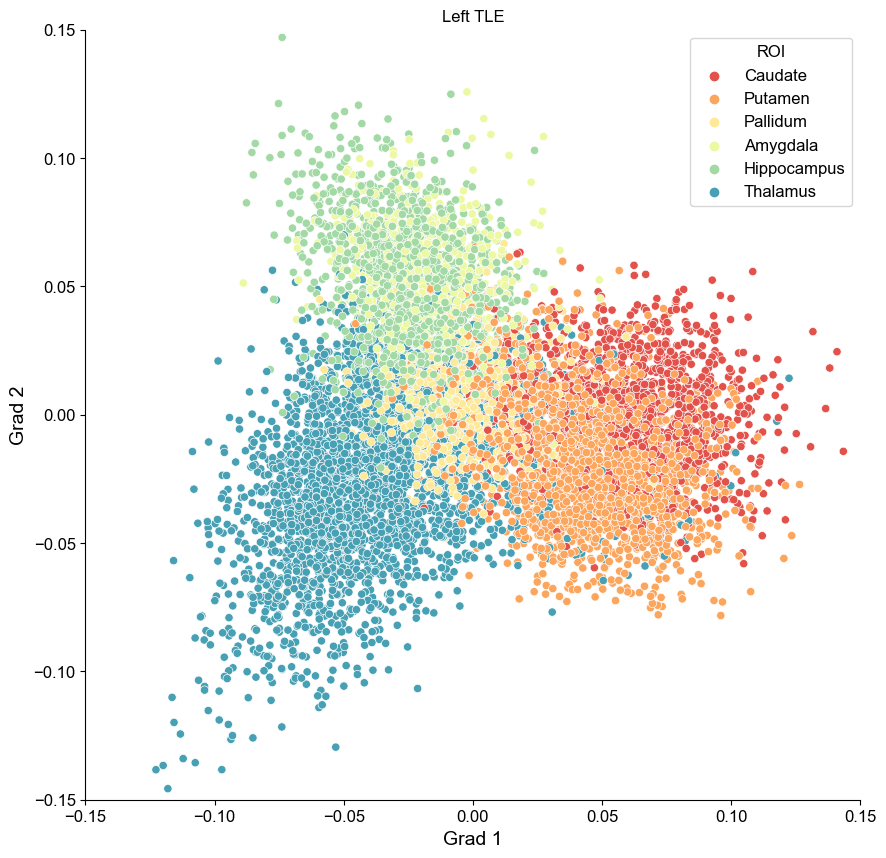

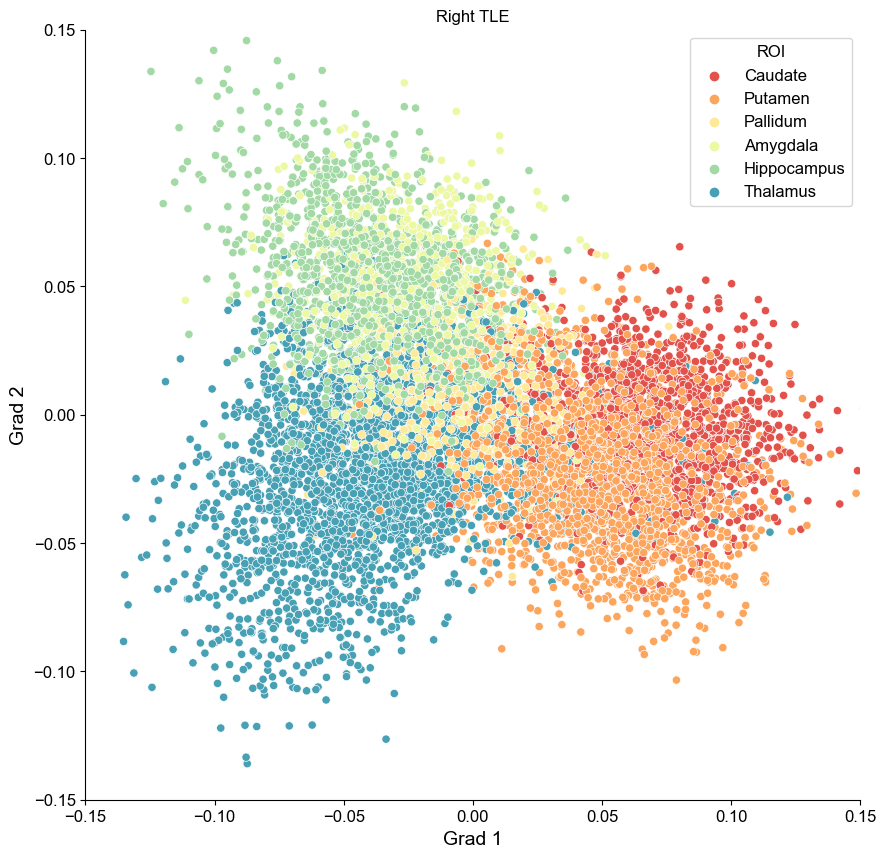

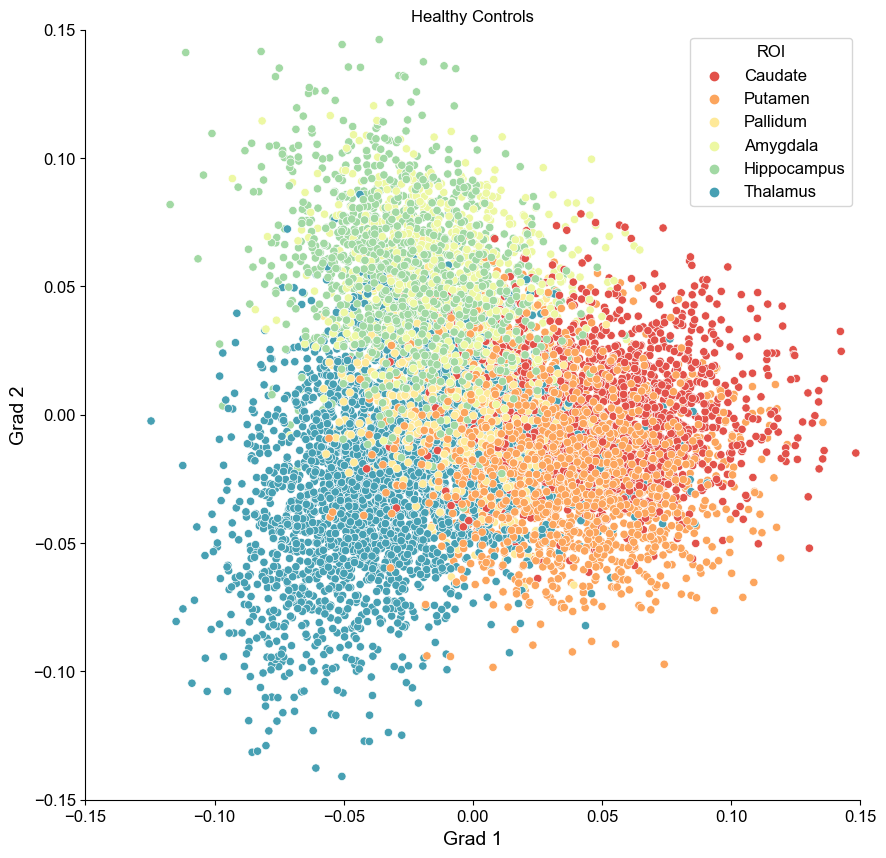

In [22]:
df_plot2 = pd.DataFrame()
df_plot2['Grad 1'] = -np.hstack((np.mean(data_dict['ep_L_grad'],axis=2)[:,0] , np.mean(data_dict['ep_R_grad'],axis=2)[:,0], np.mean(data_dict['hc_grad'],axis=2)[:,0]))
df_plot2['Grad 2'] = np.hstack((np.mean(data_dict['ep_L_grad'],axis=2)[:,1] , np.mean(data_dict['ep_R_grad'],axis=2)[:,1],  np.mean(data_dict['hc_grad'],axis=2)[:,1]))
df_plot2['Group'] = ['L-TLE']*len(np.mean(data_dict['ep_L_grad'],axis=2)[:,1]) + ['R-TLE']*len(np.mean(data_dict['ep_R_grad'],axis=2)[:,1]) + ['HC']*len(np.mean(data_dict['hc_grad'],axis=2)[:,1])
df_plot2['ROI'] = np.hstack((region_names_all_bl,region_names_all_bl, region_names_all_bl))


plt.figure(figsize=(10,10))
plt.title('Left TLE')
sns.scatterplot(x='Grad 1', y='Grad 2', hue='ROI', data=df_plot2[df_plot2['Group']=='L-TLE'],  hue_order=['Caudate','Putamen','Pallidum','Amygdala','Hippocampus','Thalamus'], palette='Spectral')
plt.xlim([-0.15,0.15])
plt.ylim([-0.15,0.15])
sns.despine()
#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/supplementary_figure_global_gradient1/ltle_global_gradient.pdf')

plt.figure(figsize=(10,10))
plt.title('Right TLE')
sns.scatterplot(x='Grad 1', y='Grad 2', hue='ROI', data=df_plot2[df_plot2['Group']=='R-TLE'],  hue_order=['Caudate','Putamen','Pallidum','Amygdala','Hippocampus','Thalamus'], palette='Spectral')
plt.xlim([-0.15,0.15])
plt.ylim([-0.15,0.15])
sns.despine()
#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/supplementary_figure_global_gradient1/rtle_global_gradient.pdf')

plt.figure(figsize=(10,10))
plt.title('Healthy Controls')
sns.scatterplot(x='Grad 1', y='Grad 2', hue='ROI', data=df_plot2[df_plot2['Group']=='HC'], hue_order=['Caudate','Putamen','Pallidum','Amygdala','Hippocampus','Thalamus'], palette='Spectral')
plt.xlim([-0.15,0.15])
plt.ylim([-0.15,0.15])
sns.despine()
#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/supplementary_figure_global_gradient1/hc_global_gradient.pdf')


## Individual Region Scatterplots - Supplementary Figure 

In [23]:
# re-define dataframes for plotting

df_plot = pd.DataFrame()
df_plot['Grad 1'] = np.hstack((np.mean(data_dict['ep_L_grad'],axis=2)[:,0] , np.mean(data_dict['ep_R_grad'],axis=2)[:,0]))
df_plot['Grad 2'] = np.hstack((np.mean(data_dict['ep_L_grad'],axis=2)[:,1] , np.mean(data_dict['ep_R_grad'],axis=2)[:,1]))
df_plot['Group'] = ['L-TLE']*len(np.mean(data_dict['ep_L_grad'],axis=2)[:,1]) + ['R-TLE']*len(np.mean(data_dict['ep_R_grad'],axis=2)[:,1])
df_plot['ROI'] = np.hstack((region_names_all_l_tle,region_names_all_r_tle))

df_plot2 = pd.DataFrame()
df_plot2['Grad 1'] = np.hstack((np.mean(data_dict['ep_L_grad'],axis=2)[:,0] , np.mean(data_dict['ep_R_grad'],axis=2)[:,0]))
df_plot2['Grad 2'] = np.hstack((np.mean(data_dict['ep_L_grad'],axis=2)[:,1] , np.mean(data_dict['ep_R_grad'],axis=2)[:,1]))
df_plot2['Group'] = ['L-TLE']*len(np.mean(data_dict['ep_L_grad'],axis=2)[:,1]) + ['R-TLE']*len(np.mean(data_dict['ep_R_grad'],axis=2)[:,1])
df_plot2['ROI'] = np.hstack((region_names_all_bl,region_names_all_bl))


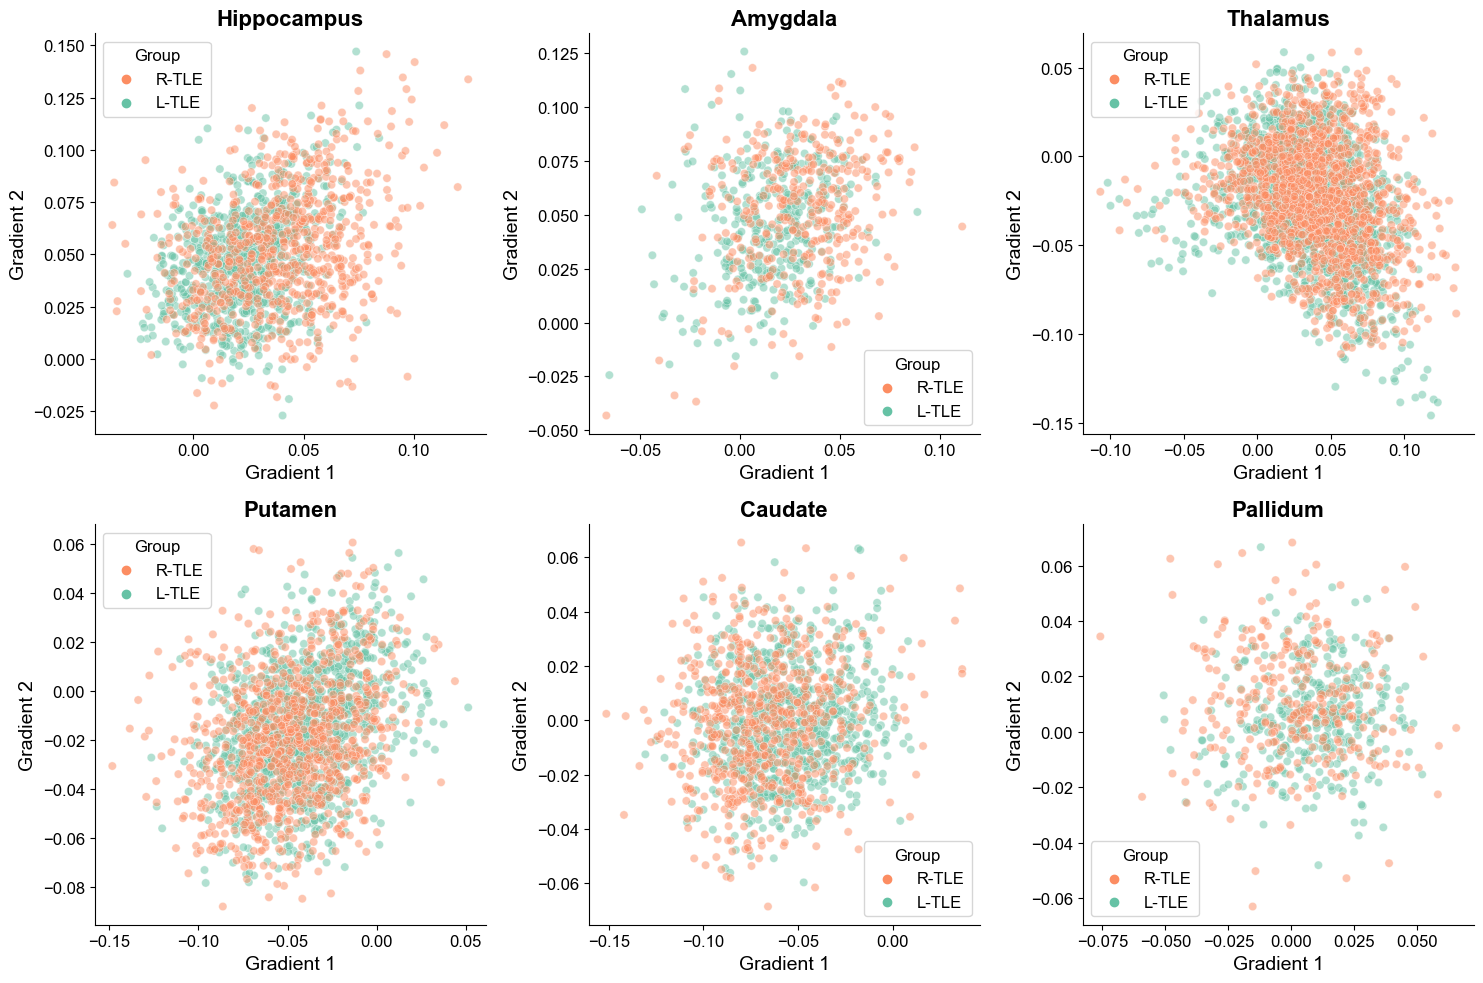

In [26]:
sns.set_palette(['#FC8D62','#66C2A5'])
plt.figure(figsize=(15,10))

plt.subplot(231)
roi = 'I-Hippocampus'
sns.scatterplot(x='Grad 1', y='Grad 2', hue='Group', data=df_plot[df_plot['ROI']==roi], hue_order=['R-TLE','L-TLE'], alpha=0.5)
plt.xlabel('Gradient 1')
plt.ylabel('Gradient 2')
plt.title(roi[2:], fontsize=16, fontweight='bold')
sns.despine()

plt.subplot(232)
roi = 'I-Amygdala'
sns.scatterplot(x='Grad 1', y='Grad 2', hue='Group', data=df_plot[df_plot['ROI']==roi], hue_order=['R-TLE','L-TLE'], alpha=0.5)
plt.xlabel('Gradient 1')
plt.ylabel('Gradient 2')
plt.title(roi[2:], fontsize=16, fontweight='bold')
sns.despine()

plt.subplot(233)
roi = 'I-Thalamus'
sns.scatterplot(x='Grad 1', y='Grad 2', hue='Group', data=df_plot[df_plot['ROI']==roi], hue_order=['R-TLE','L-TLE'], alpha=0.5)
plt.xlabel('Gradient 1')
plt.ylabel('Gradient 2')
plt.title(roi[2:], fontsize=16, fontweight='bold')
sns.despine()

plt.subplot(234)
roi = 'I-Putamen'
sns.scatterplot(x='Grad 1', y='Grad 2', hue='Group', data=df_plot[df_plot['ROI']==roi], hue_order=['R-TLE','L-TLE'], alpha=0.5)
plt.xlabel('Gradient 1')
plt.ylabel('Gradient 2')
plt.title(roi[2:], fontsize=16, fontweight='bold')
sns.despine()

plt.subplot(235)
roi = 'I-Caudate'
sns.scatterplot(x='Grad 1', y='Grad 2', hue='Group', data=df_plot[df_plot['ROI']==roi], hue_order=['R-TLE','L-TLE'], alpha=0.5)
plt.xlabel('Gradient 1')
plt.ylabel('Gradient 2')
plt.title(roi[2:], fontsize=16, fontweight='bold')
sns.despine()

plt.subplot(236)
roi = 'I-Pallidum'
sns.scatterplot(x='Grad 1', y='Grad 2', hue='Group', data=df_plot[df_plot['ROI']==roi], hue_order=['R-TLE','L-TLE'], alpha=0.5)
plt.xlabel('Gradient 1')
plt.ylabel('Gradient 2')
plt.title(roi[2:], fontsize=16, fontweight='bold')
plt.tight_layout()
sns.despine()

#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/supplementary_figure_2d_gradients/2d_gradients_ipsi_updated.pdf')

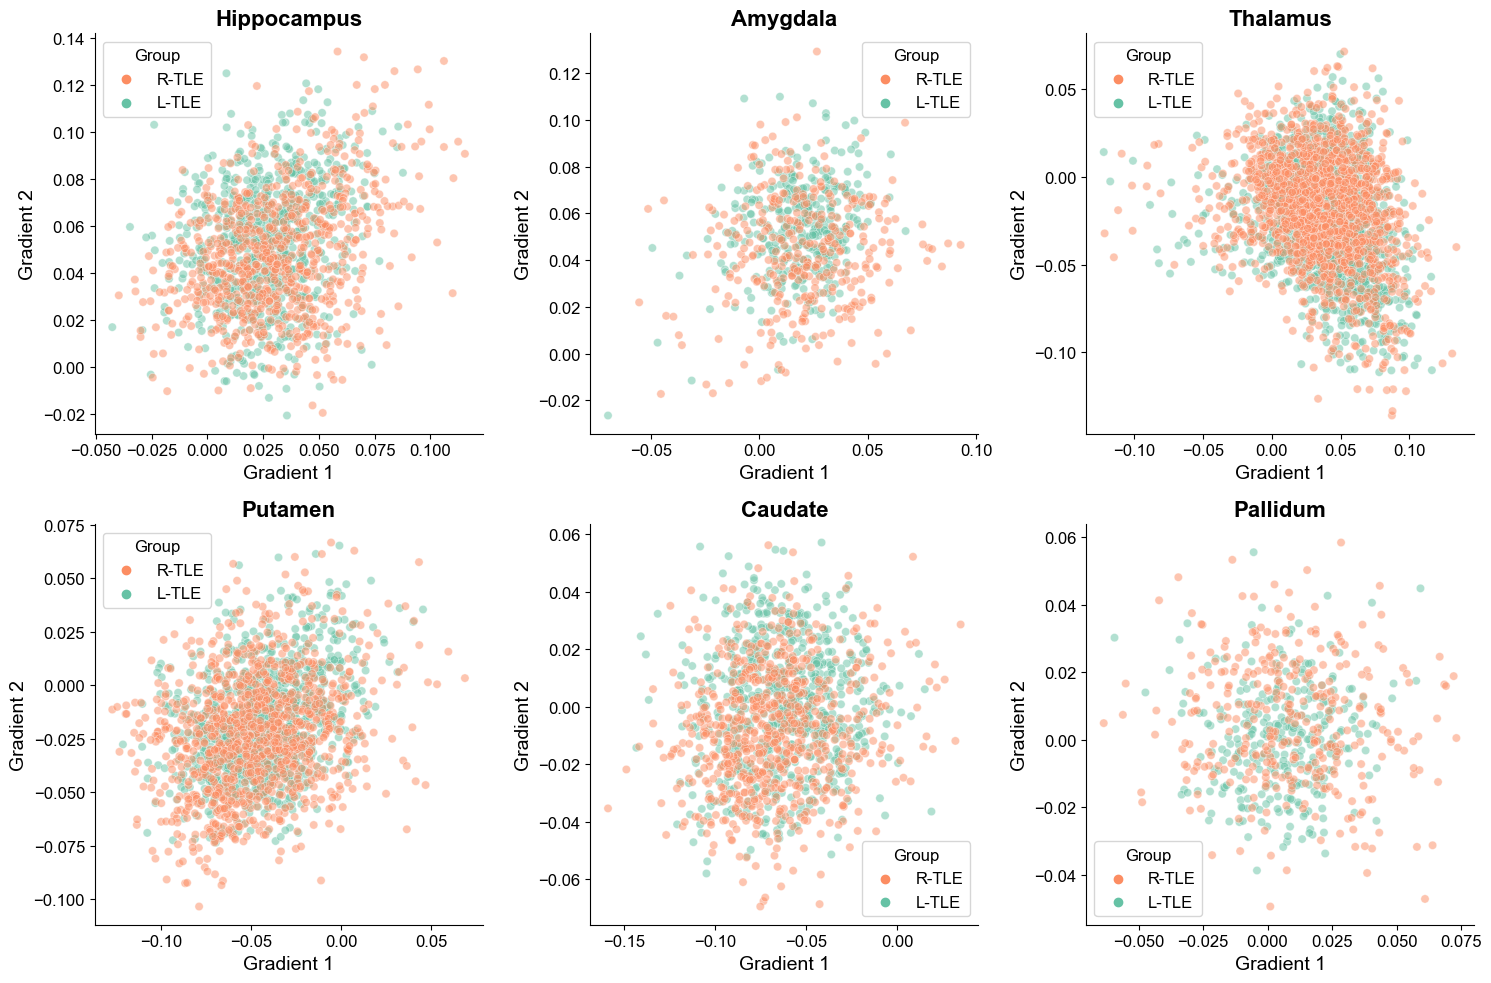

In [27]:
plt.figure(figsize=(15,10))

plt.subplot(231)
roi = 'C-Hippocampus'
sns.scatterplot(x='Grad 1', y='Grad 2', hue='Group', data=df_plot[df_plot['ROI']==roi], hue_order=['R-TLE','L-TLE'], alpha=0.5)
plt.xlabel('Gradient 1')
plt.ylabel('Gradient 2')
plt.title(roi[2:], fontsize=16, fontweight='bold')
sns.despine()

plt.subplot(232)
roi = 'C-Amygdala'
sns.scatterplot(x='Grad 1', y='Grad 2', hue='Group', data=df_plot[df_plot['ROI']==roi], hue_order=['R-TLE','L-TLE'], alpha=0.5)
plt.xlabel('Gradient 1')
plt.ylabel('Gradient 2')
plt.title(roi[2:], fontsize=16, fontweight='bold')
sns.despine()

plt.subplot(233)
roi = 'C-Thalamus'
sns.scatterplot(x='Grad 1', y='Grad 2', hue='Group', data=df_plot[df_plot['ROI']==roi], hue_order=['R-TLE','L-TLE'], alpha=0.5)
plt.xlabel('Gradient 1')
plt.ylabel('Gradient 2')
plt.title(roi[2:], fontsize=16, fontweight='bold')
sns.despine()

plt.subplot(234)
roi = 'C-Putamen'
sns.scatterplot(x='Grad 1', y='Grad 2', hue='Group', data=df_plot[df_plot['ROI']==roi], hue_order=['R-TLE','L-TLE'], alpha=0.5)
plt.xlabel('Gradient 1')
plt.ylabel('Gradient 2')
plt.title(roi[2:], fontsize=16, fontweight='bold')
sns.despine()

plt.subplot(235)
roi = 'C-Caudate'
sns.scatterplot(x='Grad 1', y='Grad 2', hue='Group', data=df_plot[df_plot['ROI']==roi], hue_order=['R-TLE','L-TLE'], alpha=0.5)
plt.xlabel('Gradient 1')
plt.ylabel('Gradient 2')
plt.title(roi[2:], fontsize=16, fontweight='bold')
sns.despine()

plt.subplot(236)
roi = 'C-Pallidum'
sns.scatterplot(x='Grad 1', y='Grad 2', hue='Group', data=df_plot[df_plot['ROI']==roi], hue_order=['R-TLE','L-TLE'], alpha=0.5)
plt.xlabel('Gradient 1')
plt.ylabel('Gradient 2')
plt.title(roi[2:], fontsize=16, fontweight='bold')
plt.tight_layout()
sns.despine()

#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/supplementary_figure_2d_gradients/2d_gradients_contra_updated.pdf')

#### Functions for computing the Bhattacharyya distance

In [28]:
def bhatta(a, b):
    m0 = np.mean(a,axis=0)
    m1 = np.mean(b,axis=0)
    diff = m1 - m0
    
    S0 = np.cov(a, rowvar=False)
    S1 = np.cov(b, rowvar=False)
    
    S_avg = (S0 + S1)/2
    iS_avg = np.linalg.inv(S_avg)
    
    det_term = .5 * np.log(np.linalg.det(S_avg) / np.sqrt(np.linalg.det(S0) * np.linalg.det(S1)))
    mahal_term = .125 * diff.T @ iS_avg @ diff
    
    return det_term + mahal_term

def permute_bhatta(data_dict, roi, n=1000):
    
    # get the real t-statistic and p-value
    r_real = np.mean(data_dict['ep_R_grad'],axis=2)[np.array(region_names_all_r_tle)==roi, :]
    l_real = np.mean(data_dict['ep_L_grad'],axis=2)[np.array(region_names_all_l_tle)==roi, :]

    b_real = bhatta(r_real, l_real)

    perm_X = np.concatenate((data_dict['ep_R_grad'],data_dict['ep_L_grad']),axis=2)
    
    idx = np.arange(55)
    b_perm = []
    for i in range(n):
        np.random.shuffle(idx)
        r = np.mean(perm_X[:,:,idx[:23]],axis=2)
        l = np.mean(perm_X[:,:,idx[23:]],axis=2)
        r_roi = r[np.array(region_names_all_r_tle)==roi, :]
        l_roi = l[np.array(region_names_all_l_tle)==roi, :]
        b_perm.append(bhatta(r_roi, l_roi))
    # this is a one sided p-value
    # print('Permuted p-value for ',roi,':', (np.sum(t_perm>t_real)+1)/(n+1))

    # this is a two-sided p-value
    #print('Permuted p-value for ',roi,':', (np.sum(t_perm>np.abs(t_real)) + np.sum(t_perm<-np.abs(t_real))+1)/(n+1))
    print('Bhatta p-value for ',roi,':', (np.sum(b_perm>b_real)+1)/(len(b_perm)+1))
    p = (np.sum(b_perm>b_real)+1)/(len(b_perm)+1)
    print('--------\n')
    return b_real, p


In [29]:
i_distance = []
c_distance = []
for roi in region_names:
    # df_plot already has the means across subjects
    a = df_plot[(df_plot['ROI']==roi).values & (df_plot['Group']=='L-TLE').values][['Grad 1','Grad 2']].values
    b = df_plot[(df_plot['ROI']==roi).values & (df_plot['Group']=='R-TLE').values][['Grad 1','Grad 2']].values
    print(roi)
    print('Distance:', bhatta(a,b))
    if 'I' in roi:
        i_distance.append(bhatta(a,b))
    else:
        c_distance.append(bhatta(a,b))
    permute_bhatta(data_dict,roi)


I-Hippocampus
Distance: 0.09846349174432985
Bhatta p-value for  I-Hippocampus : 0.04495504495504495
--------

C-Hippocampus
Distance: 0.03187071479055259
Bhatta p-value for  C-Hippocampus : 0.35664335664335667
--------

I-Amygdala
Distance: 0.055240022696885514
Bhatta p-value for  I-Amygdala : 0.3246753246753247
--------

C-Amygdala
Distance: 0.06640298492479091
Bhatta p-value for  C-Amygdala : 0.4955044955044955
--------

I-Thalamus
Distance: 0.007254095692094991
Bhatta p-value for  I-Thalamus : 0.7422577422577422
--------

C-Thalamus
Distance: 0.01208095180799602
Bhatta p-value for  C-Thalamus : 0.8301698301698301
--------

I-Caudate
Distance: 0.027243643524246887
Bhatta p-value for  I-Caudate : 0.6433566433566433
--------

C-Caudate
Distance: 0.027576864078616703
Bhatta p-value for  C-Caudate : 0.5454545454545454
--------

I-Putamen
Distance: 0.016366901236119856
Bhatta p-value for  I-Putamen : 0.45354645354645357
--------

C-Putamen
Distance: 0.024224553973192474
Bhatta p-value for

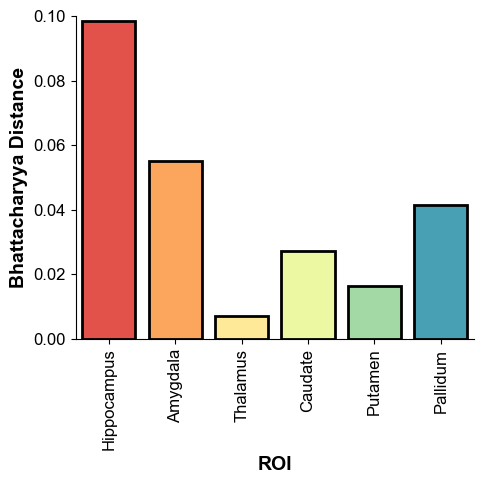

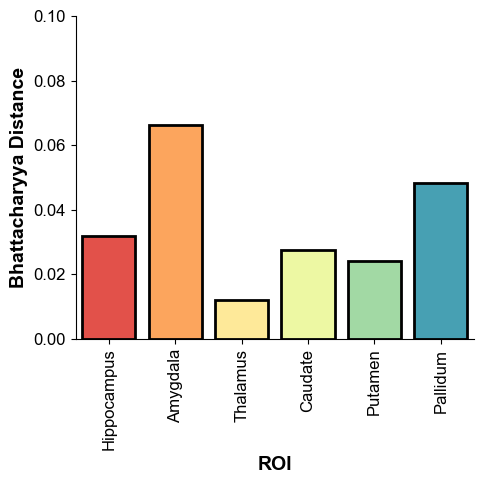

In [31]:
# for ipsilateral regions
df_plot_dist = pd.DataFrame()
df_plot_dist['Bhatta Distance'] = i_distance
df_plot_dist['ROI'] = ['Hippocampus','Amygdala','Thalamus','Caudate','Putamen','Pallidum']

plt.figure(figsize=(5,5))
sns.barplot(x='ROI', y='Bhatta Distance', data=df_plot_dist,palette='Spectral', linewidth=2, edgecolor='k', saturation=1)
sns.despine()
plt.xticks(rotation=90)
plt.ylim([0,0.10])
plt.xlabel('ROI',fontweight='bold')
plt.ylabel('Bhattacharyya Distance',fontweight='bold')
plt.tight_layout()
#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/supplementary_figure_2d_gradients/distance_bars_ipsi.pdf')

# for contralateral regions
df_plot_dist = pd.DataFrame()
df_plot_dist['Bhatta Distance'] = c_distance
df_plot_dist['ROI'] = ['Hippocampus','Amygdala','Thalamus','Caudate','Putamen','Pallidum']

plt.figure(figsize=(5,5))
sns.barplot(x='ROI', y='Bhatta Distance', data=df_plot_dist,palette='Spectral', linewidth=2, edgecolor='k', saturation=1)
sns.despine()
plt.xticks(rotation=90)
plt.ylim([0,0.10])
plt.xlabel('ROI',fontweight='bold')
plt.ylabel('Bhattacharyya Distance',fontweight='bold')
plt.tight_layout()
#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/supplementary_figure_2d_gradients/distance_bars_contra.pdf')

## Assessing the Variance of the Gradients

In [36]:
# Bootstrap the t-test
from statsmodels.stats.multitest import fdrcorrection

import random

  
def sample(data):
    sample = [random.choice(data) for _ in range(len(data))]
    return sample


def bootstrap_t_test_old(treatment, control, nboot = 1000, direction = "less"):

    ones = np.vstack((np.ones(len(treatment)),treatment))

    treatment = ones.conj().transpose()

    zeros = np.vstack((np.zeros(len(control)), control))

    control = zeros.conj().transpose()

    Z = np.vstack((treatment, control))

    tstat = np.mean(treatment[:,1])-np.mean(control[:,1])

    tboot = np.zeros(nboot)

    for i in range(nboot):

        sboot = sample(Z)

        sboot = pd.DataFrame(np.array(sboot), columns=['treat', 'vals'])

        tboot[i] = np.mean(sboot['vals'][sboot['treat'] == 1]) - np.mean(sboot['vals'][sboot['treat'] == 0]) - tstat

    if direction == "greater":

        pvalue = np.sum(tboot>=tstat-0)/nboot

    elif direction == "less":

        pvalue = np.sum(tboot<=tstat-0)/nboot

    else:
        pvalue = np.sum(np.abs(tboot) >= np.abs(tstat)) / nboot

  

    print ('The p-value is ',pvalue)


def bootstrap_t_test(x1,x2, nboot=1000, direction='less'):
    t,p = stats.ttest_ind(x1,x2)

    n1 = len(x1)
    n2 = len(x2)

    group = np.hstack([x1,x2])
    group_mean = np.mean(group)
    mu1 = np.mean(x1)
    mu2 = np.mean(x2)

    idx = np.arange((n1+n2))

    group_demeaned = np.hstack([x1-mu1,x2-mu2]) + group_mean

    t_boot_list = []
    for i in range(nboot):
        np.random.shuffle(idx)
        samp1 = group_demeaned[np.random.randint(0,n1+n2, size=n1)]
        samp2 = group_demeaned[np.random.randint(0,n1+n2, size=n2)]
        t_boot, p_boot = stats.ttest_ind(samp1, samp2)
        t_boot_list.append(t_boot)

    if direction=='less':
        p_val = (np.sum(np.array(t_boot_list)<=t)+1)/(nboot+1)
    else:
        p_val = (np.sum(np.array(t_boot_list)>=t)+1)/(nboot+1)
    return p_val

def bootstrap_t_test(x1,x2, nboot=1000, direction='less'):

    # this is really a permuted t-test

    t = np.mean(x1)-np.mean(x2)

    n1 = len(x1)
    n2 = len(x2)

    group = np.hstack([x1,x2])
    group_mean = np.mean(group)
    mu1 = np.mean(x1)
    mu2 = np.mean(x2)

    idx = np.arange((n1+n2))

    t_boot_list = []
    for i in range(nboot):
        np.random.shuffle(idx)
        samp1 = group[idx[:n1]]
        samp2 = group[idx[n1:]]
        t_boot = np.mean(samp1) - np.mean(samp2)
        t_boot_list.append(t_boot)

    if direction=='both':
        p_val = (np.sum(np.array(t_boot_list)<=-np.abs(t)) + np.sum(np.array(t_boot_list)>=np.abs(t))+1)/(nboot+1)
    elif direction=='less':
        p_val = (np.sum(np.array(t_boot_list)<=(t))+1)/(nboot+1)
    elif direction=='greater':
        p_val = (np.sum(np.array(t_boot_list)>=(t))+1)/(nboot+1)

    return p_val

# This measures the variance for each subject

def get_coef_var(arr,axis=1):
    return np.var(arr,axis=axis)


#### Difference in Variance between Groups

Text(0.5, 1.0, 'Variance in R-TLE')

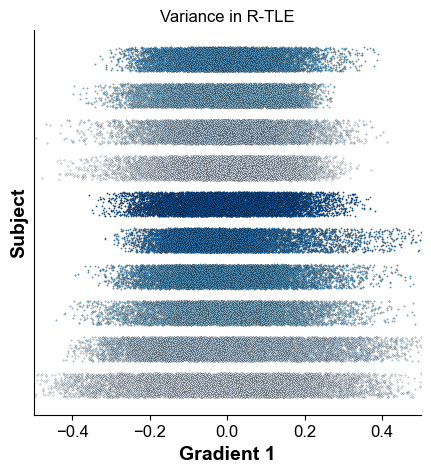

In [38]:
sns.set_palette('Blues')
plt.figure(figsize=(5,5))

variance_list = []
for i in range(data_dict['ep_R_grad'].shape[-1]):
    variance_list.append(np.var(data_dict['ep_R_grad'][:,0,i]))

count = 0
for i in np.argsort(variance_list)[::-1][:10]:
    plt.scatter(data_dict['ep_R_grad'][:,0,i]-np.mean(data_dict['ep_R_grad'][:,0,i]), np.random.rand(data_dict['ep_R_grad'][:,0,0].shape[0])/1.5+count, s=1, edgecolors='k', linewidths=0.1)
    count += 1
plt.xlim([-0.5,0.5])
sns.despine()
plt.ylabel('Subject', weight='bold')
plt.xlabel('Gradient 1', weight='bold')
plt.yticks([])
plt.title('Variance in R-TLE')

Text(0.5, 1.0, 'Variance in L-TLE')

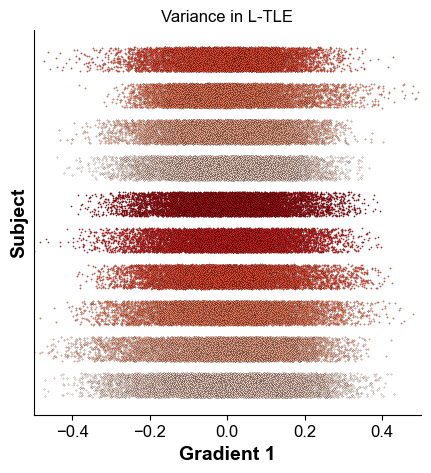

In [39]:
sns.set_palette('Reds')
plt.figure(figsize=(5,5))
variance_list = []
for i in range(data_dict['ep_L_grad'].shape[-1]):
    variance_list.append(np.var(data_dict['ep_L_grad'][:,0,i]))

count = 0
for i in np.argsort(variance_list)[::-1][:10]:
    plt.scatter(data_dict['ep_L_grad'][:,0,i]-np.mean(data_dict['ep_L_grad'][:,0,i]), np.random.rand(data_dict['ep_L_grad'][:,0,0].shape[0])/1.5+count, s=1, edgecolors='k', linewidths=0.1)
    count += 1
plt.xlim([-0.5,0.5])
sns.despine()
plt.ylabel('Subject', weight='bold')
plt.xlabel('Gradient 1', weight='bold')
plt.yticks([])
plt.title('Variance in L-TLE')

Text(0.5, 1.0, 'Variance in HC')

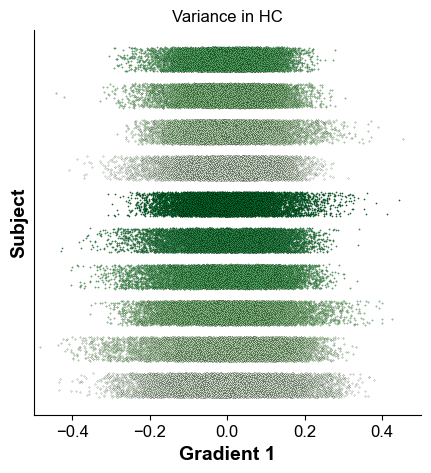

In [40]:
sns.set_palette('Greens')
plt.figure(figsize=(5,5))

variance_list = []
for i in range(data_dict['hc_grad'].shape[-1]):
    variance_list.append(np.var(data_dict['hc_grad'][:,0,i]))

count = 0
for i in np.argsort(variance_list)[::-1][:10]:
    plt.scatter(data_dict['hc_grad'][:,0,i]-np.mean(data_dict['hc_grad'][:,0,i]), np.random.rand(data_dict['hc_grad'][:,0,0].shape[0])/1.5+count, s=1, edgecolors='k', linewidths=0.1)
    count += 1
plt.xlim([-0.5,0.5])
sns.despine()
plt.ylabel('Subject', weight='bold')
plt.xlabel('Gradient 1', weight='bold')
plt.yticks([])
plt.title('Variance in HC')


#### Comparing variance between TLE and controls

Bootstrap t-test: 0.029970029970029972
Cohen's d: -0.544502052038226


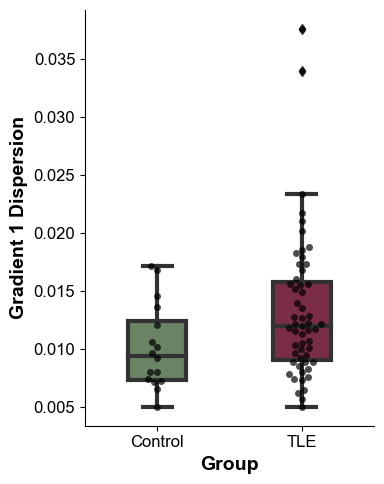

In [48]:
# L-TLE and R-TLE Combined
gradient = 0
sns.set_palette(['#67885F','#852242'])
df_plot_all = pd.DataFrame()
df_plot_all['Gradient 1 Variance'] = np.hstack([np.abs(get_coef_var(data_dict['hc_grad'][:,gradient,:],0)), np.abs(get_coef_var(data_dict['ep_L_grad'][:,gradient,:],0)), np.abs(get_coef_var(data_dict['ep_R_grad'][:,gradient,:],0))])
df_plot_all['Group'] = ['Control']*len(np.abs(get_coef_var(data_dict['hc_grad'][:,gradient,:],0))) + ['TLE']*len(np.abs(get_coef_var(data_dict['ep_L_grad'][:,gradient,:],0))) + ['TLE']*len(np.abs(get_coef_var(data_dict['ep_R_grad'][:,gradient,:],0)))
plt.figure(figsize=(4,5))
sns.boxplot(x='Group', y='Gradient 1 Variance', data=df_plot_all, width=0.4, linewidth=3)
sns.swarmplot(x='Group', y='Gradient 1 Variance', data=df_plot_all, color='k', alpha=0.7)
plt.xlabel('Group', weight='bold')
plt.ylabel('Gradient 1 Dispersion', weight='bold')

sns.despine()
plt.tight_layout()

# remove outliers

## df_plot_all = df_plot_all[df_plot_all['Gradient 1 Variance']<0.03]

print("Bootstrap t-test:",bootstrap_t_test(df_plot_all[df_plot_all['Group']=='Control']['Gradient 1 Variance'],df_plot_all[df_plot_all['Group']=='TLE']['Gradient 1 Variance']))

print("Cohen's d:",cohend(df_plot_all[df_plot_all['Group']=='Control']['Gradient 1 Variance'],df_plot_all[df_plot_all['Group']=='TLE']['Gradient 1 Variance']))
#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/gradient_variance/gradient2_variance_lr_combined.pdf')

##### Comparing gradient 1 variance in L-TLE, R-TLE and Controls

In [51]:
gradient = 0

print('R-TLE and Controls')
# plt.boxplot([np.abs(get_coef_var(data_dict['hc_grad'][:,gradient,:],0)),np.abs(get_coef_var(data_dict['ep_R_grad'][:,gradient,:],0))])
# #print(stats.ttest_ind(np.abs(get_coef_var(data_dict['hc_grad'][:,0,:],0)),np.abs(get_coef_var(data_dict['ep_R_grad'][:,0,:],0))))
# plt.title('R-TLE vs. Controls')
print("Bootstrap t-test:",bootstrap_t_test(np.abs(get_coef_var(data_dict['hc_grad'][:,gradient,:],0)),np.abs(get_coef_var(data_dict['ep_R_grad'][:,gradient,:],0))))
print("Cohen's d:", cohend(np.abs(get_coef_var(data_dict['hc_grad'][:,gradient,:],0)),np.abs(get_coef_var(data_dict['ep_R_grad'][:,gradient,:],0))))


# plt.figure()
print('\nL-TLE and Controls')
# plt.boxplot([np.abs(get_coef_var(data_dict['hc_grad'][:,gradient,:],0)),np.abs(get_coef_var(data_dict['ep_L_grad'][:,gradient,:],0))])
# #print(stats.ttest_ind(np.abs(get_coef_var(data_dict['hc_grad'][:,0,:],0)),np.abs(get_coef_var(data_dict['ep_L_grad'][:,0,:],0))))
# plt.title('L-TLE vs. Controls')
print("Bootstrap t-test:",bootstrap_t_test(np.abs(get_coef_var(data_dict['hc_grad'][:,gradient,:],0)),np.abs(get_coef_var(data_dict['ep_L_grad'][:,gradient,:],0))))
print("Cohen's d:",cohend(np.abs(get_coef_var(data_dict['hc_grad'][:,gradient,:],0)),np.abs(get_coef_var(data_dict['ep_L_grad'][:,gradient,:],0))))



# plt.figure()
print('\nL-TLE and R-TLE')
# plt.boxplot([np.abs(get_coef_var(data_dict['ep_R_grad'][:,gradient,:],0)),np.abs(get_coef_var(data_dict['ep_L_grad'][:,gradient,:],0))])
# #print(stats.ttest_ind(np.abs(get_coef_var(data_dict['hc_grad'][:,0,:],0)),np.abs(get_coef_var(data_dict['ep_L_grad'][:,0,:],0))))
# plt.title('L-TLE vs. R-TLE')
print("Bootstrap t-test:",bootstrap_t_test(np.abs(get_coef_var(data_dict['ep_R_grad'][:,0,:],0)),np.abs(get_coef_var(data_dict['ep_L_grad'][:,0,:],0)),direction='greater'))
print("Cohen's d:",cohend(np.abs(get_coef_var(data_dict['ep_R_grad'][:,gradient,:],0)),np.abs(get_coef_var(data_dict['ep_L_grad'][:,gradient,:],0))))


df_plot_all = pd.DataFrame()
df_plot_all['Gradient 1 Variance'] = np.hstack([np.abs(get_coef_var(data_dict['hc_grad'][:,gradient,:],0)), np.abs(get_coef_var(data_dict['ep_L_grad'][:,gradient,:],0)), np.abs(get_coef_var(data_dict['ep_R_grad'][:,gradient,:],0))])
df_plot_all['Group'] = ['Control']*len(np.abs(get_coef_var(data_dict['hc_grad'][:,gradient,:],0))) + ['L-TLE']*len(np.abs(get_coef_var(data_dict['ep_L_grad'][:,gradient,:],0))) + ['R-TLE']*len(np.abs(get_coef_var(data_dict['ep_R_grad'][:,gradient,:],0)))


R-TLE and Controls
Bootstrap t-test: 0.01098901098901099
Cohen's d: -0.6859424955452234

L-TLE and Controls
Bootstrap t-test: 0.04895104895104895
Cohen's d: -0.4892668241891609

L-TLE and R-TLE
Bootstrap t-test: 0.1008991008991009
Cohen's d: 0.33973912878113677


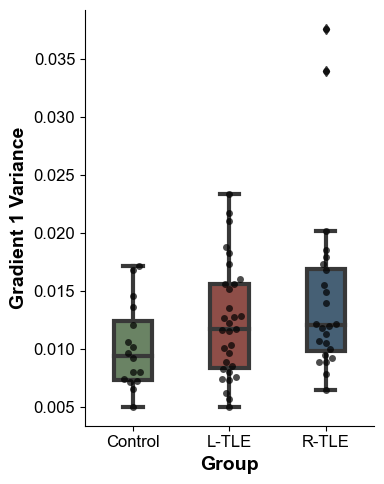

In [52]:
sns.set_palette(['#67885F','#9A453C','#3E617D'])
plt.figure(figsize=(4,5))
sns.boxplot(x='Group', y='Gradient 1 Variance', data=df_plot_all, width=0.4, linewidth=3)
sns.swarmplot(x='Group', y='Gradient 1 Variance', data=df_plot_all, color='k', alpha=0.7)
plt.xlabel('Group', weight='bold')
plt.ylabel('Gradient 1 Variance', weight='bold')

sns.despine()
plt.tight_layout()
#plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/gradient_variance/global_varaiance_boxplot_updated.pdf')

## Subject Space Analysis

#### Functions for comparing subject space gradient ROIs

In [70]:
# Permute the statistic 
def permute_statistic(data_dict, roi, gradient, n=2000):
    
    # get the real t-statistic and p-value
    r_real = np.mean(data_dict['ep_R_grad'][np.array(region_names_all_r_tle)==roi,:,:],axis=0)[gradient,:]
    l_real = np.mean(data_dict['ep_L_grad'][np.array(region_names_all_l_tle)==roi,:,:],axis=0)[gradient,:]

    t_real, p_real = stats.ttest_ind(r_real, l_real)
    cohend_val = cohend(r_real, l_real)

    perm_X = np.concatenate((data_dict['ep_R_grad'],data_dict['ep_L_grad']),axis=2)
    
    idx = np.arange(55)
    t_perm = []
    p_perm = []
    for i in range(n):
        np.random.shuffle(idx)
        r = np.mean(perm_X[:,:,idx[:23]][np.array(region_names_all_r_tle)==roi, gradient],axis=0)
        l = np.mean(perm_X[:,:,idx[23:]][np.array(region_names_all_l_tle)==roi, gradient],axis=0)
        r_roi = r
        l_roi = l
        t, p = stats.ttest_ind(r_roi, l_roi)
        t_perm.append(t)
        p_perm.append(p)
    print('Cohen D for',roi,':', cohend_val)
    print('Actual p-value for ',roi,':', p_real)

    # This is two-sided!
    #print('Permuted p-value for ',roi,':', (np.sum(t_perm>np.abs(t_real)) + np.sum(t_perm<-np.abs(t_real))+1)/(n+1))
    print('Permuted p-value for ',roi,':', (np.sum(t_perm>=np.max([t_real,-t_real])) + np.sum(t_perm<=np.min([t_real,-t_real]))+1)/(n+1))
    
    print('--------\n')

def permute_variance(data_dict, roi, gradient, n=2000):
    
    # get the real t-statistic and p-value
    r_real = np.var(data_dict['ep_R_grad'][np.array(region_names_all_r_tle)==roi,:,:],axis=0)[gradient,:]
    l_real = np.var(data_dict['ep_L_grad'][np.array(region_names_all_l_tle)==roi,:,:],axis=0)[gradient,:]

    t_real, p_real = stats.ttest_ind(r_real, l_real)
    cohend_val = cohend(r_real, l_real)

    perm_X = np.concatenate((data_dict['ep_R_grad'],data_dict['ep_L_grad']),axis=2)
    
    idx = np.arange(55)
    t_perm = []
    p_perm = []
    for i in range(n):
        np.random.shuffle(idx)
        r = np.var(perm_X[:,:,idx[:23]][np.array(region_names_all_r_tle)==roi, gradient],axis=0)
        l = np.var(perm_X[:,:,idx[23:]][np.array(region_names_all_l_tle)==roi, gradient],axis=0)
        r_roi = r
        l_roi = l
        t, p = stats.ttest_ind(r_roi, l_roi)
        t_perm.append(t)
        p_perm.append(p)
    print('Cohen D for',roi,':', cohend_val)
    print('Actual p-value for ',roi,':', p_real)

    # This is two-sided!
    #print('Permuted p-value for ',roi,':', (np.sum(t_perm>np.abs(t_real)) + np.sum(t_perm<-np.abs(t_real))+1)/(n+1))
    print('Permuted p-value for ',roi,':', (np.sum(t_perm>=np.max([t_real,-t_real])) + np.sum(t_perm<=np.min([t_real,-t_real]))+1)/(n+1))
    print('--------\n')

def bootstrap_t_test(x1,x2, nboot=1000, direction='both'):

    # this is really a permuted t-test

    t = np.mean(x1)-np.mean(x2)

    n1 = len(x1)
    n2 = len(x2)

    group = np.hstack([x1,x2])
    group_mean = np.mean(group)
    mu1 = np.mean(x1)
    mu2 = np.mean(x2)

    idx = np.arange((n1+n2))

    t_boot_list = []
    for i in range(nboot):
        np.random.shuffle(idx)
        samp1 = group[idx[:n1]]
        samp2 = group[idx[n1:]]
        t_boot = np.mean(samp1) - np.mean(samp2)
        t_boot_list.append(t_boot)

    if direction=='both':
        p_val = (np.sum(np.array(t_boot_list)<=np.min([t,-t])) + np.sum(np.array(t_boot_list)>=np.max([t,-t]))+1)/(nboot+1)
    elif direction=='less':
        p_val = (np.sum(np.array(t_boot_list)<=(t))+1)/(nboot+1)
    elif direction=='greater':
        p_val = (np.sum(np.array(t_boot_list)>=(t))+1)/(nboot+1)

    return p_val



In [71]:
# Permutation corrected difference in means
for roi in region_names:
    permute_statistic(data_dict, roi, 0)

KeyboardInterrupt: 

In [60]:
# Permutation corrected difference in variance
for roi in region_names:
    permute_variance(data_dict, roi, 0)

Cohen D for I-Hippocampus : 0.5343284045372481
Actual p-value for  I-Hippocampus : 0.05463800098346524
Permuted p-value for  I-Hippocampus : 0.06846576711644178
--------

Cohen D for C-Hippocampus : 0.3779989454521754
Actual p-value for  C-Hippocampus : 0.17026142913437664
Permuted p-value for  C-Hippocampus : 0.19540229885057472
--------

Cohen D for I-Amygdala : 0.42140860923408313
Actual p-value for  I-Amygdala : 0.12711266579904879
Permuted p-value for  I-Amygdala : 0.1359320339830085
--------

Cohen D for C-Amygdala : 0.3339295689720649
Actual p-value for  C-Amygdala : 0.22480785462069086
Permuted p-value for  C-Amygdala : 0.22638680659670166
--------

Cohen D for I-Thalamus : 0.3600159134519858
Actual p-value for  I-Thalamus : 0.19114604071475072
Permuted p-value for  I-Thalamus : 0.1984007996001999
--------

Cohen D for C-Thalamus : 0.20629258886621066
Actual p-value for  C-Thalamus : 0.4513736491628554
Permuted p-value for  C-Thalamus : 0.47226386806596704
--------

Cohen D for

Z-Score values relative to control

In [72]:
ep_L_zscored = (data_dict['ep_L_grad'] - np.repeat(np.mean(data_dict['hc_grad'],axis=2)[:,:,np.newaxis],31,axis=2))/np.repeat(np.std(data_dict['hc_grad'],axis=2)[:,:,np.newaxis],31,axis=2)
ep_R_zscored = (data_dict['ep_R_grad'] - np.repeat(np.mean(data_dict['hc_grad'],axis=2)[:,:,np.newaxis],24,axis=2))/np.repeat(np.std(data_dict['hc_grad'],axis=2)[:,:,np.newaxis],24,axis=2)

Get the mean gradient values within an ROI across subjects

In [73]:
def get_mean_roi_gradient(gradient_arr, gradient, rois_gradient, rois):
    mean_gradient_list = []
    for i in range(len(rois)):
        mean_gradient_list.append(np.nanmean(gradient_arr[rois_gradient==rois[i],gradient,:],axis=0))
    return np.array(mean_gradient_list)


Plot the mean distribution of gradient values within an ROI

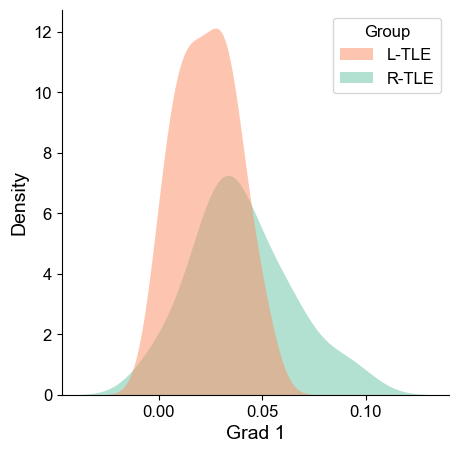

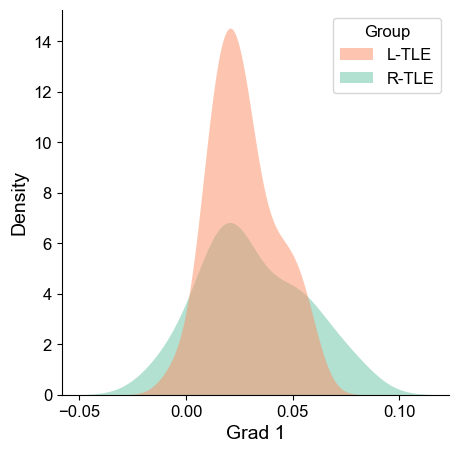

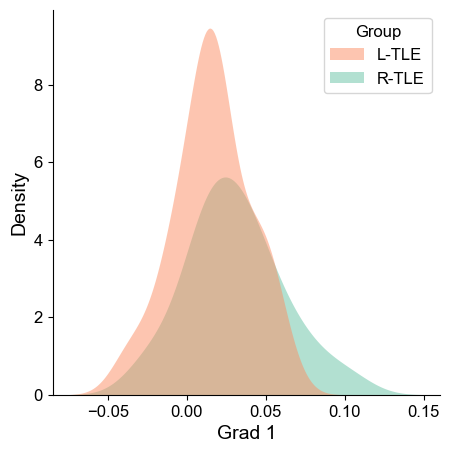

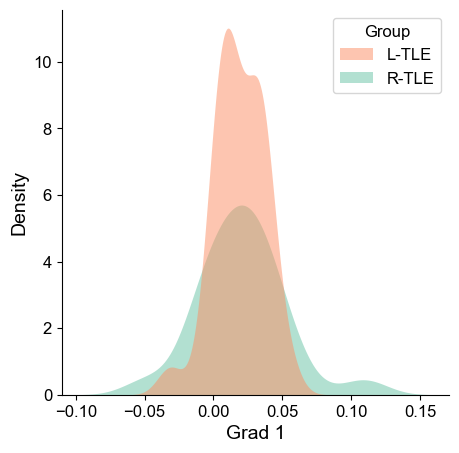

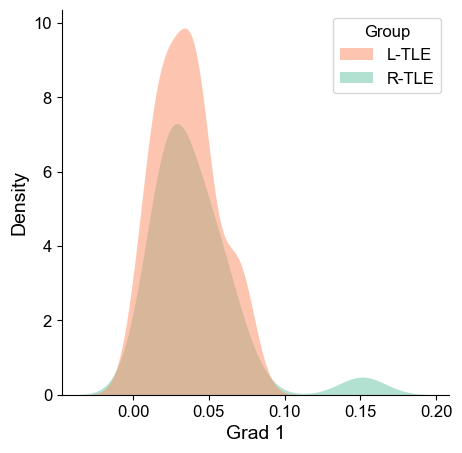

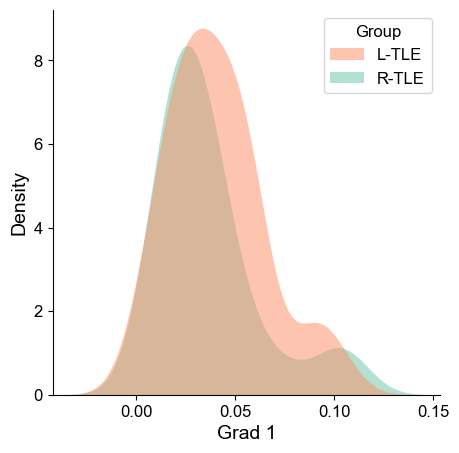

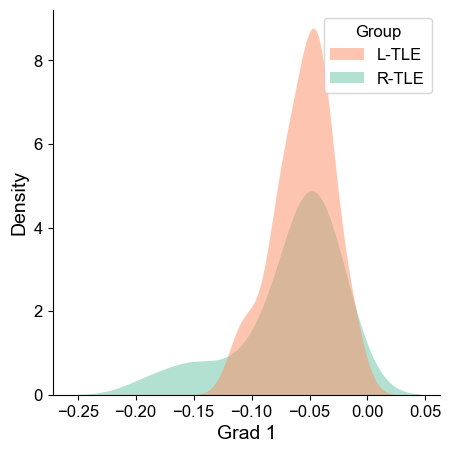

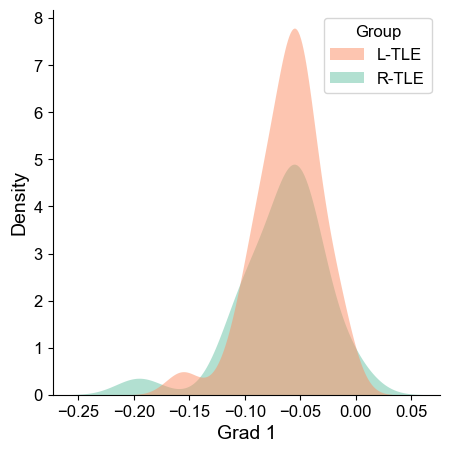

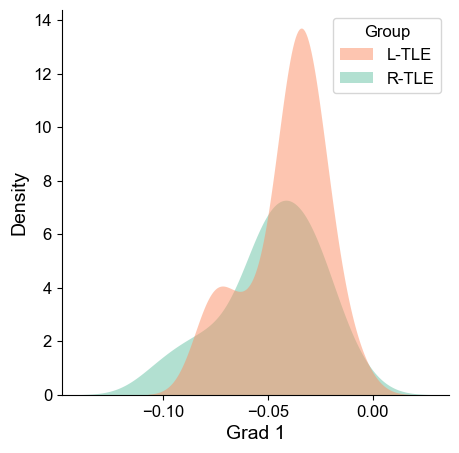

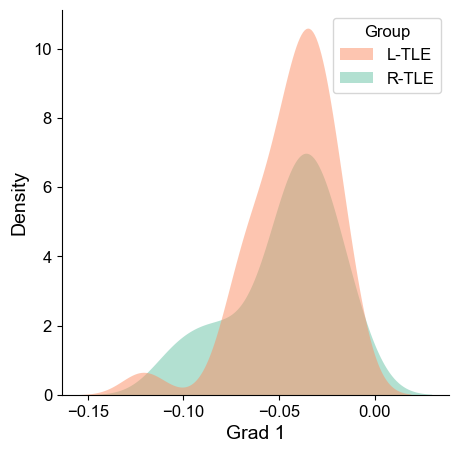

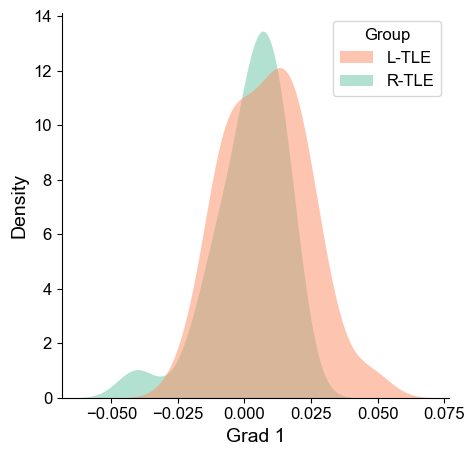

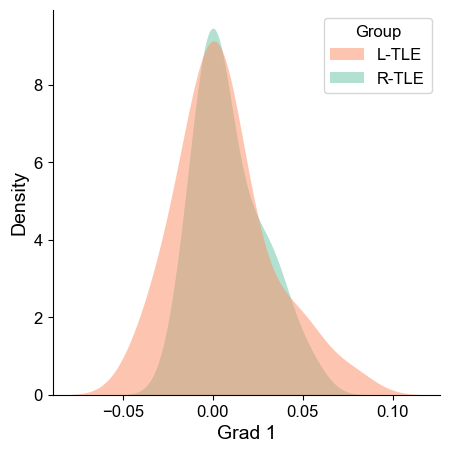

In [77]:
sns.set_palette(['#FC8D62','#66C2A5'])

for roi in region_names:
   plt.figure(figsize=(5,5))
   df_plot = pd.DataFrame()
   df_plot['Grad 1'] = np.hstack((get_mean_roi_gradient(data_dict['ep_L_grad'], 0, np.array(region_names_all_l_tle), region_names)[np.array(region_names)==roi], get_mean_roi_gradient(data_dict['ep_R_grad'], 0, np.array(region_names_all_r_tle), region_names)[np.array(region_names)==roi]))[0]
   df_plot['Grad 2'] = np.hstack((get_mean_roi_gradient(data_dict['ep_L_grad'], 1, np.array(region_names_all_l_tle), region_names)[np.array(region_names)==roi], get_mean_roi_gradient(data_dict['ep_R_grad'], 1, np.array(region_names_all_r_tle), region_names)[np.array(region_names)==roi]))[0]
   df_plot['Group'] = ['L-TLE']*data_dict['ep_L_grad'].shape[-1] + ['R-TLE']*data_dict['ep_R_grad'].shape[-1]

   sns.kdeplot(x='Grad 1', hue='Group',data=df_plot, fill=True, common_norm=True, 
      alpha=.5, linewidth=0)
   sns.despine()


In [65]:
# Create a function to Z-Score relative to controls
def z_score(x, ref):
    return (x-np.mean(ref))/(np.std(ref))

In [66]:
# Gradient 1

sns.set_palette(['#66C2A5','#FC8D62'])

skip = True

if skip==False:

   p_grad1 = []
   for roi in region_names:
      plt.figure(figsize=(3,5))
      plt.subplot(211)
      df_plot = pd.DataFrame()
      df_plot['Grad 1'] = np.hstack((get_mean_roi_gradient(data_dict['ep_L_grad'], 0, np.array(region_names_all_l_tle), region_names)[np.array(region_names)==roi], get_mean_roi_gradient(data_dict['ep_R_grad'], 0, np.array(region_names_all_r_tle), region_names)[np.array(region_names)==roi]))[0]
      df_plot['Grad 2'] = np.hstack((get_mean_roi_gradient(data_dict['ep_L_grad'], 1, np.array(region_names_all_l_tle), region_names)[np.array(region_names)==roi], get_mean_roi_gradient(data_dict['ep_R_grad'], 1, np.array(region_names_all_r_tle), region_names)[np.array(region_names)==roi]))[0]
      df_plot['Group'] = ['L-TLE']*data_dict['ep_L_grad'].shape[-1] + ['R-TLE']*data_dict['ep_R_grad'].shape[-1]

      sns.boxplot(y='Grad 1', x='Group',data=df_plot,  saturation=1, linewidth=4, width=0.65)
      sns.swarmplot(y='Grad 1', x='Group',data=df_plot, color='k', alpha=0.7)
      plt.title(roi)
      sns.despine()
      print(roi)
      print('t-test, average: ',bootstrap_t_test(get_mean_roi_gradient(data_dict['ep_L_grad'], 0, np.array(region_names_all_l_tle), region_names)[np.array(region_names)==roi][0],get_mean_roi_gradient(data_dict['ep_R_grad'], 0, np.array(region_names_all_r_tle), region_names)[np.array(region_names)==roi][0]))
      print('Cohens D, average: ',cohend(get_mean_roi_gradient(data_dict['ep_L_grad'], 0, np.array(region_names_all_l_tle), region_names)[np.array(region_names)==roi][0],get_mean_roi_gradient(data_dict['ep_R_grad'], 0, np.array(region_names_all_r_tle), region_names)[np.array(region_names)==roi][0]))
      t,p = stats.ttest_ind(get_mean_roi_gradient(data_dict['ep_L_grad'], 0, np.array(region_names_all_l_tle), region_names)[np.array(region_names)==roi][0],get_mean_roi_gradient(data_dict['ep_R_grad'], 0, np.array(region_names_all_r_tle), region_names)[np.array(region_names)==roi][0])
      p_grad1.append(p)
      #plt.xlabel('Group', weight='bold')
      plt.xlabel('')
      plt.ylabel('Gradient 1 \n (average)', weight='bold')

      plt.subplot(212)
      df_plot = pd.DataFrame()

      df_plot['Grad 1'] = np.hstack([np.var(data_dict['ep_L_grad'][np.array(region_names_all_l_tle)==roi,0,:],axis=0), np.var(data_dict['ep_R_grad'][np.array(region_names_all_r_tle)==roi,0,:],axis=0)])
      df_plot['Grad 2'] = np.hstack([np.var(data_dict['ep_L_grad'][np.array(region_names_all_l_tle)==roi,1,:],axis=0), np.var(data_dict['ep_R_grad'][np.array(region_names_all_r_tle)==roi,1,:],axis=0)])
      df_plot['Group'] = ['L-TLE']*data_dict['ep_L_grad'].shape[-1] + ['R-TLE']*data_dict['ep_R_grad'].shape[-1]

      sns.boxplot(y='Grad 1', x='Group',data=df_plot,  saturation=1, linewidth=4, width=0.65)
      sns.swarmplot(y='Grad 1', x='Group',data=df_plot, color='k', alpha=0.7)
      sns.despine()
      print('t-test, variance: ',bootstrap_t_test(np.var(data_dict['ep_L_grad'][np.array(region_names_all_l_tle)==roi,0,:],axis=0), np.var(data_dict['ep_R_grad'][np.array(region_names_all_r_tle)==roi,0,:],axis=0)))
      print('Cohens D, variance: ',cohend(np.var(data_dict['ep_L_grad'][np.array(region_names_all_l_tle)==roi,0,:],axis=0), np.var(data_dict['ep_R_grad'][np.array(region_names_all_r_tle)==roi,0,:],axis=0)))

      plt.xlabel('Group', weight='bold')
      plt.ylabel('Gradient 1 \n(variance)', weight='bold')
      plt.tight_layout()
      print('\n\n')
      #plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/variance_mean_grad1/'+roi+'.pdf')

   # Gradient 2
   print('----- Gradient 2 -----')
   p_grad2 = []
   for roi in region_names:
      plt.figure(figsize=(3,5))
      plt.subplot(211)
      df_plot = pd.DataFrame()
      df_plot['Grad 1'] = np.hstack((get_mean_roi_gradient(data_dict['ep_L_grad'], 0, np.array(region_names_all_l_tle), region_names)[np.array(region_names)==roi], get_mean_roi_gradient(data_dict['ep_R_grad'], 0, np.array(region_names_all_r_tle), region_names)[np.array(region_names)==roi]))[0]
      df_plot['Grad 2'] = np.hstack((get_mean_roi_gradient(data_dict['ep_L_grad'], 1, np.array(region_names_all_l_tle), region_names)[np.array(region_names)==roi], get_mean_roi_gradient(data_dict['ep_R_grad'], 1, np.array(region_names_all_r_tle), region_names)[np.array(region_names)==roi]))[0]
      df_plot['Group'] = ['L-TLE']*data_dict['ep_L_grad'].shape[-1] + ['R-TLE']*data_dict['ep_R_grad'].shape[-1]

      sns.boxplot(y='Grad 2', x='Group',data=df_plot,  saturation=1, linewidth=4, width=0.65)
      sns.swarmplot(y='Grad 2', x='Group',data=df_plot, color='k', alpha=0.7)
      plt.title(roi)
      sns.despine()
      print(roi)
      print('t-test, average: ',bootstrap_t_test(get_mean_roi_gradient(data_dict['ep_L_grad'], 1, np.array(region_names_all_l_tle), region_names)[np.array(region_names)==roi][0],get_mean_roi_gradient(data_dict['ep_R_grad'], 1, np.array(region_names_all_r_tle), region_names)[np.array(region_names)==roi][0]))
      print('Cohens D, average: ',cohend(get_mean_roi_gradient(data_dict['ep_L_grad'], 1, np.array(region_names_all_l_tle), region_names)[np.array(region_names)==roi][0],get_mean_roi_gradient(data_dict['ep_R_grad'], 1, np.array(region_names_all_r_tle), region_names)[np.array(region_names)==roi][0]))
      t,p = stats.ttest_ind(get_mean_roi_gradient(data_dict['ep_L_grad'], 1, np.array(region_names_all_l_tle), region_names)[np.array(region_names)==roi][0],get_mean_roi_gradient(data_dict['ep_R_grad'], 1, np.array(region_names_all_r_tle), region_names)[np.array(region_names)==roi][0])
      p_grad1.append(p)
      #plt.xlabel('Group', weight='bold')
      plt.xlabel('')
      plt.ylabel('Gradient 2 \n (average)', weight='bold')

      plt.subplot(212)
      df_plot = pd.DataFrame()

      df_plot['Grad 1'] = np.hstack([np.var(data_dict['ep_L_grad'][np.array(region_names_all_l_tle)==roi,0,:],axis=0), np.var(data_dict['ep_R_grad'][np.array(region_names_all_r_tle)==roi,0,:],axis=0)])
      df_plot['Grad 2'] = np.hstack([np.var(data_dict['ep_L_grad'][np.array(region_names_all_l_tle)==roi,1,:],axis=0), np.var(data_dict['ep_R_grad'][np.array(region_names_all_r_tle)==roi,1,:],axis=0)])
      df_plot['Group'] = ['L-TLE']*data_dict['ep_L_grad'].shape[-1] + ['R-TLE']*data_dict['ep_R_grad'].shape[-1]

      sns.boxplot(y='Grad 2', x='Group',data=df_plot,  saturation=1, linewidth=4, width=0.65)
      sns.swarmplot(y='Grad 2', x='Group',data=df_plot, color='k', alpha=0.7)
      sns.despine()
      print('t-test, variance: ',bootstrap_t_test(np.var(data_dict['ep_L_grad'][np.array(region_names_all_l_tle)==roi,1,:],axis=0), np.var(data_dict['ep_R_grad'][np.array(region_names_all_r_tle)==roi,1,:],axis=0)))
      print('Cohens D, variance: ',cohend(np.var(data_dict['ep_L_grad'][np.array(region_names_all_l_tle)==roi,1,:],axis=0), np.var(data_dict['ep_R_grad'][np.array(region_names_all_r_tle)==roi,1,:],axis=0)))

      plt.xlabel('Group', weight='bold')
      plt.ylabel('Gradient 2 \n(variance)', weight='bold')
      plt.tight_layout()



Hippocampus
t-test, average:  0.001998001998001998
Cohens D, average:  -0.8709636342132557
t-test, variance:  0.052947052947052944
Cohens D, variance:  -0.5343284045372481



Hippocampus
t-test, average:  0.003996003996003996
Cohens D, average:  -0.8709636342132557
t-test, variance:  0.06293706293706294
Cohens D, variance:  -0.5343284045372481



Amygdala
t-test, average:  0.04995004995004995
Cohens D, average:  -0.5442718498061494
t-test, variance:  0.12787212787212787
Cohens D, variance:  -0.4214086092340832



Amygdala
t-test, average:  0.04995004995004995
Cohens D, average:  -0.5442718498061494
t-test, variance:  0.11888111888111888
Cohens D, variance:  -0.4214086092340832



Thalamus
t-test, average:  0.44255744255744256
Cohens D, average:  -0.21717812735808595
t-test, variance:  0.18181818181818182
Cohens D, variance:  -0.36001591345198614



Thalamus
t-test, average:  0.43156843156843155
Cohens D, average:  -0.21717812735808595
t-test, variance:  0.2037962037962038
Cohens D, var

/Users/allucas/opt/anaconda3/envs/tle_gradients/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


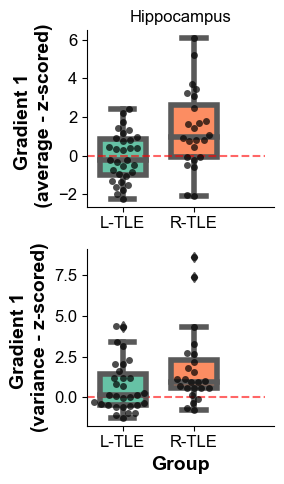

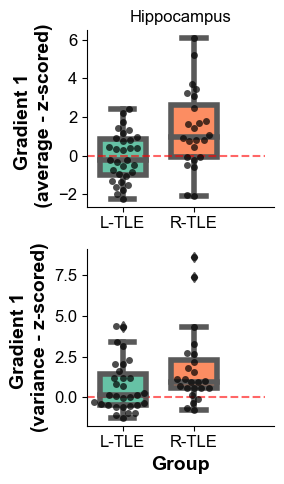

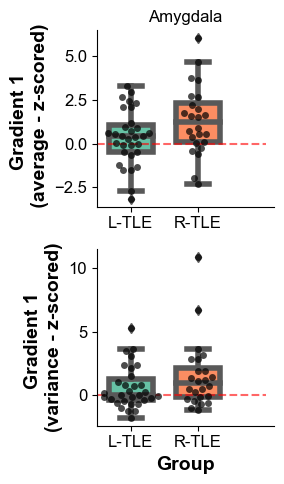

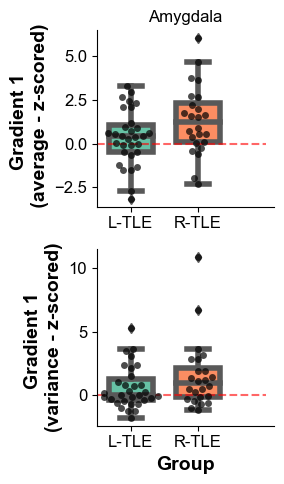

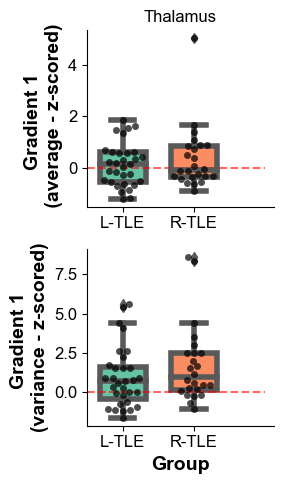

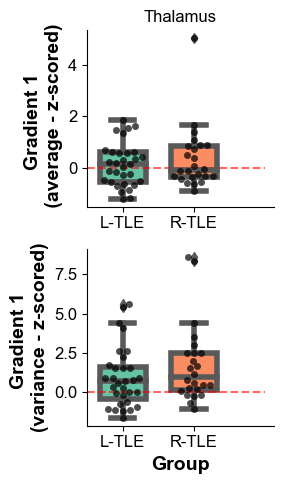

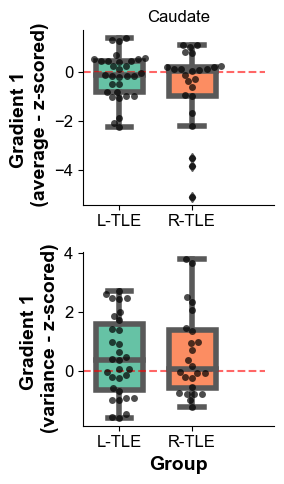

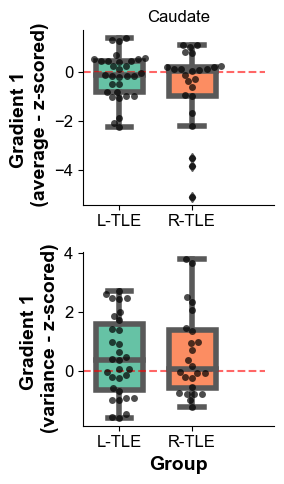

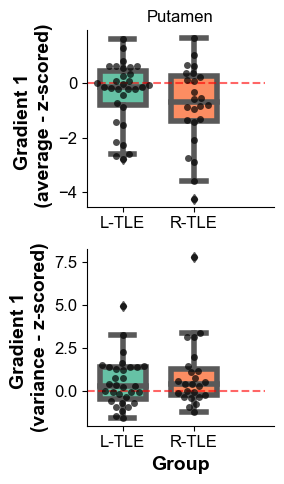

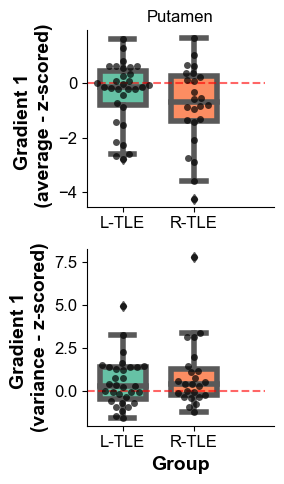

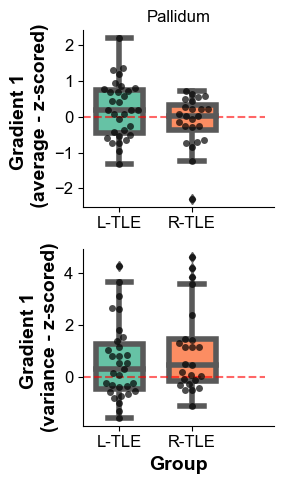

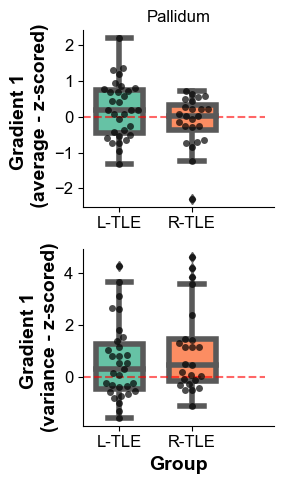

In [79]:
# As above but z-scored relative to controls

# Gradient 1

sns.set_palette(['#66C2A5','#FC8D62'])


p_grad1 = []
for roi in region_names_bl:
   plt.figure(figsize=(3,5))
   plt.subplot(211)
   df_plot = pd.DataFrame()

   ltle_g1 = get_mean_roi_gradient(data_dict['ep_L_grad'], 0, np.array(region_names_all_l_tle), region_names)[np.array(region_names)=='I-'+roi][0]
   rtle_g1 = get_mean_roi_gradient(data_dict['ep_R_grad'], 0, np.array(region_names_all_r_tle), region_names)[np.array(region_names)=='I-'+roi][0]
   c_g1 = get_mean_roi_gradient(data_dict['hc_grad'], 0, np.array(region_names_all_bl), region_names_bl)[np.array(region_names_bl)==roi][0]

   ltle_g2 = get_mean_roi_gradient(data_dict['ep_L_grad'], 1, np.array(region_names_all_l_tle), region_names)[np.array(region_names)=='I-'+roi][0]
   rtle_g2 = get_mean_roi_gradient(data_dict['ep_R_grad'], 1, np.array(region_names_all_r_tle), region_names)[np.array(region_names)=='I-'+roi][0]
   c_g2 = get_mean_roi_gradient(data_dict['hc_grad'], 1, np.array(region_names_all_bl), region_names_bl)[np.array(region_names_bl)==roi][0]

   
   df_plot['Grad 1'] = np.hstack((z_score(ltle_g1, c_g1), z_score(rtle_g1, c_g1)))
   df_plot['Grad 2'] = np.hstack((z_score(ltle_g2, c_g2), z_score(rtle_g2, c_g2)))
   df_plot['Group'] = ['L-TLE']*data_dict['ep_L_grad'].shape[-1] + ['R-TLE']*data_dict['ep_R_grad'].shape[-1]

   sns.boxplot(y='Grad 1', x='Group',data=df_plot,  saturation=1, linewidth=4, width=0.65)
   sns.swarmplot(y='Grad 1', x='Group',data=df_plot, color='k', alpha=0.7)
   plt.title(roi)

   # Add line at y=0 for controls

   plt.hlines(y=0, xmin=-0.5, xmax=2, color='r', linestyles='--', alpha=0.6)

   sns.despine()
   print(roi)
   print('t-test, average: ',bootstrap_t_test(z_score(ltle_g1, c_g1),z_score(rtle_g1, c_g1)))
   print('Cohens D, average: ',cohend(z_score(ltle_g1, c_g1),z_score(rtle_g1, c_g1)))
   t,p = stats.ttest_ind(z_score(ltle_g1, c_g1),z_score(rtle_g1, c_g1))
   p_grad1.append(p)
   #plt.xlabel('Group', weight='bold')
   plt.xlabel('')
   plt.ylabel('Gradient 1 \n (average - z-scored)', weight='bold')

   plt.subplot(212)
   df_plot = pd.DataFrame()

   ltle_g1_var = np.var(data_dict['ep_L_grad'][np.array(region_names_all_l_tle)=='I-'+roi,0,:],axis=0)
   rtle_g1_var = np.var(data_dict['ep_R_grad'][np.array(region_names_all_r_tle)=='I-'+roi,0,:],axis=0)
   c_g1_var = np.var(data_dict['hc_grad'][np.array(region_names_all_bl)==roi,0,:],axis=0)

   ltle_g2_var = np.var(data_dict['ep_L_grad'][np.array(region_names_all_l_tle)=='I-'+roi,1,:],axis=0)
   rtle_g2_var = np.var(data_dict['ep_R_grad'][np.array(region_names_all_l_tle)=='I-'+roi,1,:],axis=0)
   c_g2_var = np.var(data_dict['hc_grad'][np.array(region_names_all_bl)==roi,1,:],axis=0)

   
   df_plot['Grad 1'] = np.hstack((z_score(ltle_g1_var, c_g1_var), z_score(rtle_g1_var, c_g1_var)))
   df_plot['Grad 2'] = np.hstack((z_score(ltle_g2_var, c_g2_var), z_score(rtle_g2_var, c_g2_var)))
   df_plot['Group'] = ['L-TLE']*data_dict['ep_L_grad'].shape[-1] + ['R-TLE']*data_dict['ep_R_grad'].shape[-1]

   
   sns.boxplot(y='Grad 1', x='Group',data=df_plot,  saturation=1, linewidth=4, width=0.65)
   sns.swarmplot(y='Grad 1', x='Group',data=df_plot, color='k', alpha=0.7)

   plt.hlines(y=0, xmin=-0.5, xmax=2, color='r', linestyles='--', alpha=0.6)

   sns.despine()
   print('t-test, variance: ',bootstrap_t_test(z_score(ltle_g1_var, c_g1_var),z_score(rtle_g1_var, c_g1_var)))
   print('Cohens D, variance: ',cohend(z_score(ltle_g1_var, c_g1_var),z_score(rtle_g1_var, c_g1_var)))

   plt.xlabel('Group', weight='bold')
   plt.ylabel('Gradient 1 \n(variance - z-scored)', weight='bold')
   plt.tight_layout()
   print('\n\n')
   #plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/variance_mean_grad1/'+roi+'_z_score_updated.pdf')


Hippocampus
t-test, average:  0.42857142857142855
Cohens D, average:  -0.2260230170036941
t-test, variance:  0.16283716283716285
Cohens D, variance:  -0.37799894545217483



Hippocampus
t-test, average:  0.4095904095904096
Cohens D, average:  -0.2260230170036941
t-test, variance:  0.18281718281718282
Cohens D, variance:  -0.37799894545217483



Amygdala
t-test, average:  0.7772227772227772
Cohens D, average:  -0.07481489976538727
t-test, variance:  0.2177822177822178
Cohens D, variance:  -0.33392956897206566



Amygdala
t-test, average:  0.7792207792207793
Cohens D, average:  -0.07481489976538727
t-test, variance:  0.23576423576423577
Cohens D, variance:  -0.33392956897206566



Thalamus
t-test, average:  0.5134865134865135
Cohens D, average:  0.1765843439319863
t-test, variance:  0.43656343656343655
Cohens D, variance:  -0.2062925888662106



Thalamus
t-test, average:  0.5124875124875125
Cohens D, average:  0.1765843439319863
t-test, variance:  0.46853146853146854
Cohens D, variance: 

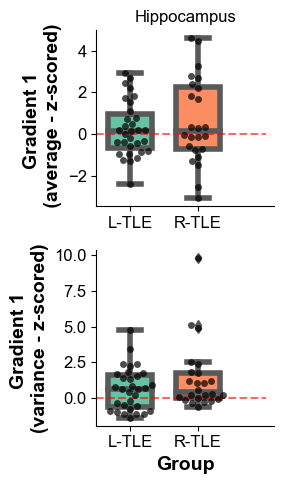

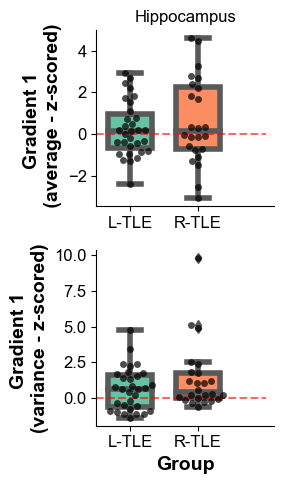

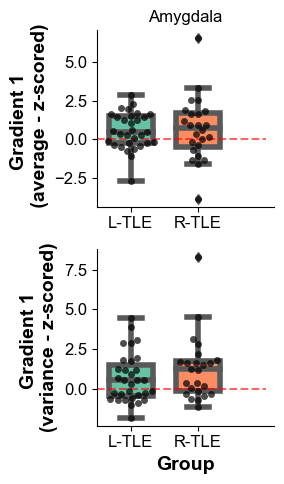

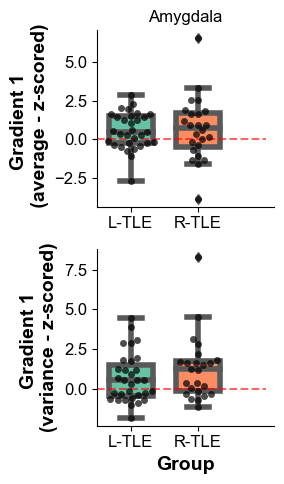

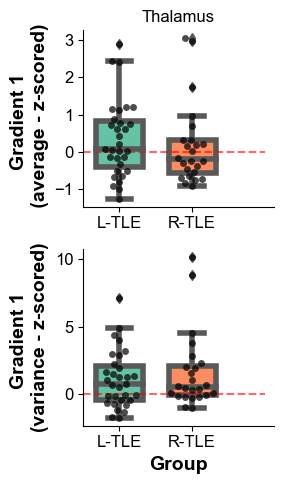

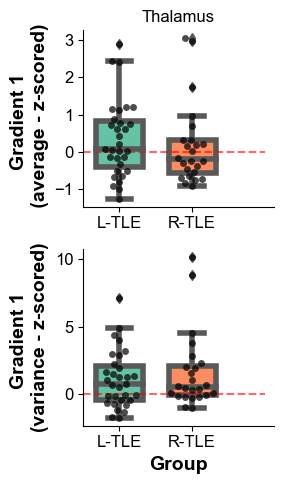

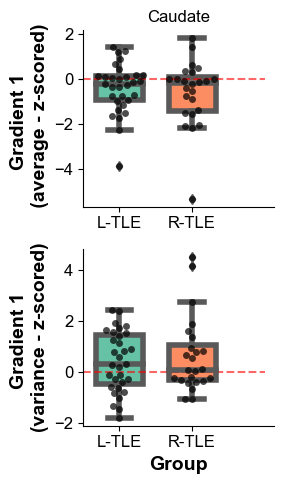

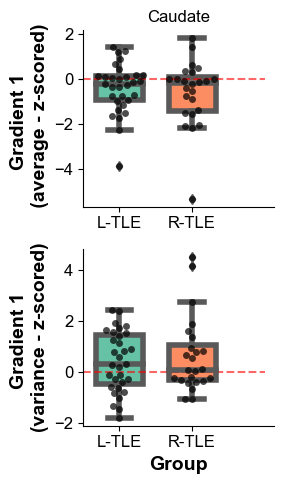

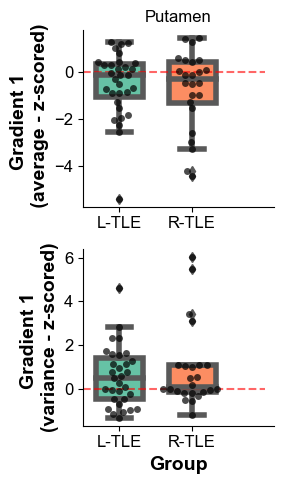

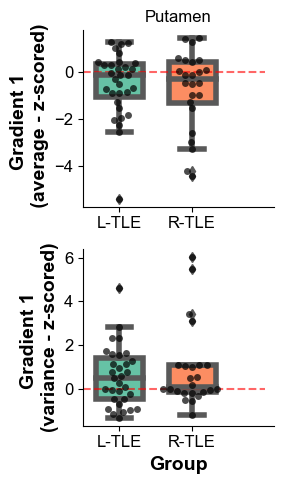

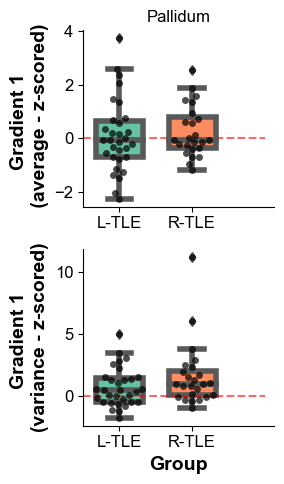

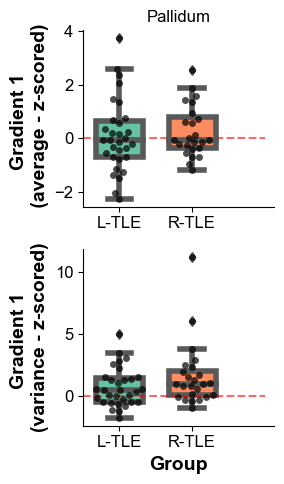

In [80]:
# As above but z-scored relative to controls - contralateral ROIs

# Gradient 1

sns.set_palette(['#66C2A5','#FC8D62'])


p_grad1 = []
for roi in region_names_bl:
   plt.figure(figsize=(3,5))
   plt.subplot(211)
   df_plot = pd.DataFrame()

   ltle_g1 = get_mean_roi_gradient(data_dict['ep_L_grad'], 0, np.array(region_names_all_l_tle), region_names)[np.array(region_names)=='C-'+roi][0]
   rtle_g1 = get_mean_roi_gradient(data_dict['ep_R_grad'], 0, np.array(region_names_all_r_tle), region_names)[np.array(region_names)=='C-'+roi][0]
   c_g1 = get_mean_roi_gradient(data_dict['hc_grad'], 0, np.array(region_names_all_bl), region_names_bl)[np.array(region_names_bl)==roi][0]

   ltle_g2 = get_mean_roi_gradient(data_dict['ep_L_grad'], 1, np.array(region_names_all_l_tle), region_names)[np.array(region_names)=='C-'+roi][0]
   rtle_g2 = get_mean_roi_gradient(data_dict['ep_R_grad'], 1, np.array(region_names_all_r_tle), region_names)[np.array(region_names)=='C-'+roi][0]
   c_g2 = get_mean_roi_gradient(data_dict['hc_grad'], 1, np.array(region_names_all_bl), region_names_bl)[np.array(region_names_bl)==roi][0]

   
   df_plot['Grad 1'] = np.hstack((z_score(ltle_g1, c_g1), z_score(rtle_g1, c_g1)))
   df_plot['Grad 2'] = np.hstack((z_score(ltle_g2, c_g2), z_score(rtle_g2, c_g2)))
   df_plot['Group'] = ['L-TLE']*data_dict['ep_L_grad'].shape[-1] + ['R-TLE']*data_dict['ep_R_grad'].shape[-1]

   sns.boxplot(y='Grad 1', x='Group',data=df_plot,  saturation=1, linewidth=4, width=0.65)
   sns.swarmplot(y='Grad 1', x='Group',data=df_plot, color='k', alpha=0.7)
   plt.title(roi)

   # Add line at y=0 for controls

   plt.hlines(y=0, xmin=-0.5, xmax=2, color='r', linestyles='--', alpha=0.6)

   sns.despine()
   print(roi)
   print('t-test, average: ',bootstrap_t_test(z_score(ltle_g1, c_g1),z_score(rtle_g1, c_g1)))
   print('Cohens D, average: ',cohend(z_score(ltle_g1, c_g1),z_score(rtle_g1, c_g1)))
   t,p = stats.ttest_ind(z_score(ltle_g1, c_g1),z_score(rtle_g1, c_g1))
   p_grad1.append(p)
   #plt.xlabel('Group', weight='bold')
   plt.xlabel('')
   plt.ylabel('Gradient 1 \n (average - z-scored)', weight='bold')

   plt.subplot(212)
   df_plot = pd.DataFrame()

   ltle_g1_var = np.var(data_dict['ep_L_grad'][np.array(region_names_all_l_tle)=='C-'+roi,0,:],axis=0)
   rtle_g1_var = np.var(data_dict['ep_R_grad'][np.array(region_names_all_r_tle)=='C-'+roi,0,:],axis=0)
   c_g1_var = np.var(data_dict['hc_grad'][np.array(region_names_all_bl)==roi,0,:],axis=0)

   ltle_g2_var = np.var(data_dict['ep_L_grad'][np.array(region_names_all_l_tle)=='C-'+roi,1,:],axis=0)
   rtle_g2_var = np.var(data_dict['ep_R_grad'][np.array(region_names_all_l_tle)=='C-'+roi,1,:],axis=0)
   c_g2_var = np.var(data_dict['hc_grad'][np.array(region_names_all_bl)==roi,1,:],axis=0)

   
   df_plot['Grad 1'] = np.hstack((z_score(ltle_g1_var, c_g1_var), z_score(rtle_g1_var, c_g1_var)))
   df_plot['Grad 2'] = np.hstack((z_score(ltle_g2_var, c_g2_var), z_score(rtle_g2_var, c_g2_var)))
   df_plot['Group'] = ['L-TLE']*data_dict['ep_L_grad'].shape[-1] + ['R-TLE']*data_dict['ep_R_grad'].shape[-1]

   
   sns.boxplot(y='Grad 1', x='Group',data=df_plot,  saturation=1, linewidth=4, width=0.65)
   sns.swarmplot(y='Grad 1', x='Group',data=df_plot, color='k', alpha=0.7)

   plt.hlines(y=0, xmin=-0.5, xmax=2, color='r', linestyles='--', alpha=0.6)

   sns.despine()
   print('t-test, variance: ',bootstrap_t_test(z_score(ltle_g1_var, c_g1_var),z_score(rtle_g1_var, c_g1_var)))
   print('Cohens D, variance: ',cohend(z_score(ltle_g1_var, c_g1_var),z_score(rtle_g1_var, c_g1_var)))

   plt.xlabel('Group', weight='bold')
   plt.ylabel('Gradient 1 \n(variance - z-scored)', weight='bold')
   plt.tight_layout()
   print('\n\n')
   #plt.savefig('/Users/allucas/Documents/research/CNT/P22_functional_gradients/reports/figures/variance_mean_grad1_contralateral/C-'+roi+'_z_score_updated.pdf')
